[15 points] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  
[15 points] Verify data quality: Explain any missing values or duplicate data. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', sep=",")



In [22]:
print(df.dtypes)
print('===========')
print(df.info())

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null ob

In [15]:
plt.figure()
df['actual_mean_temp'].diff().hist()

KeyError: 'actual_mean_temp'

In [31]:
sum(df.Arrest==1)/len(df)*100.0

25.912567600778193

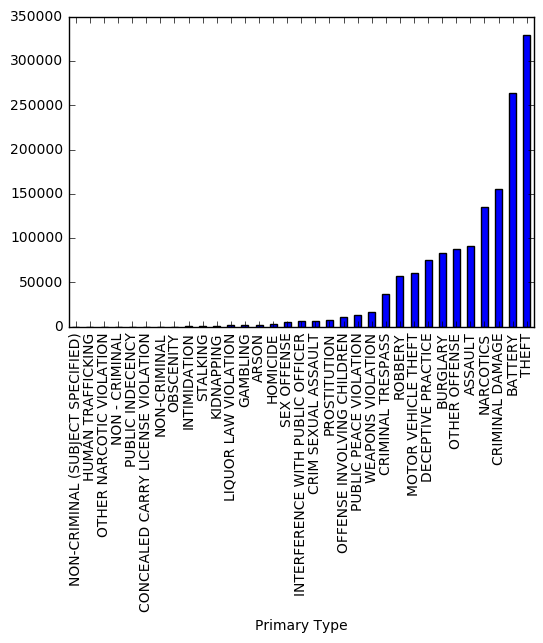

In [13]:
#for __ description, # of arrests
df_grouped = df.groupby(by="Primary Type")
arrests = df_grouped.Arrest.count()
# df["Primary Type"].describe()
# df.info()
arrests.sort_values(inplace=True)
ax = arrests.plot(kind = 'bar')

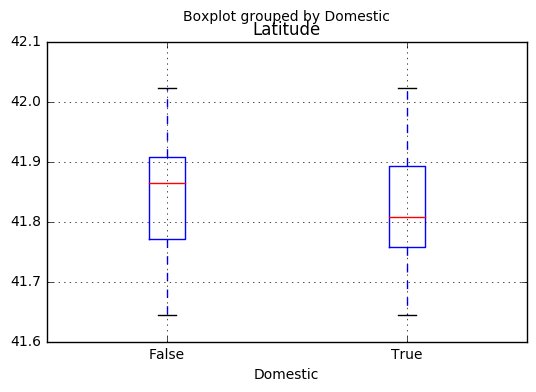

In [36]:
ax = df.boxplot(column='Latitude', by = 'Domestic') # group by class
ax.set_ybound(41.6,42.1)

count    1.456714e+06
mean     1.150644e+03
std      6.916466e+02
min      1.110000e+02
25%      6.130000e+02
50%      1.024000e+03
75%      1.711000e+03
max      2.535000e+03
Name: Beat, dtype: float64

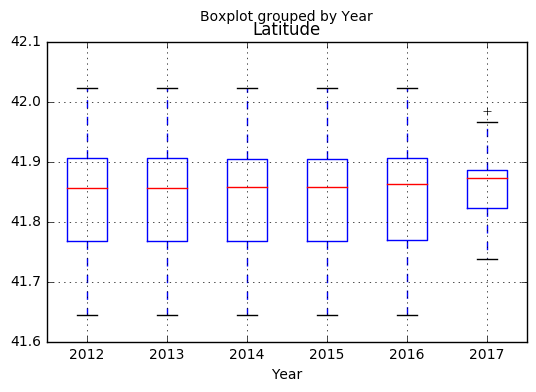

In [47]:
ax = df.boxplot(column='Latitude', by = 'Year') # group by class
ax.set_ybound(41.6,42.1)
df["Beat"].apply(str).describe()
df["Beat"].describe()



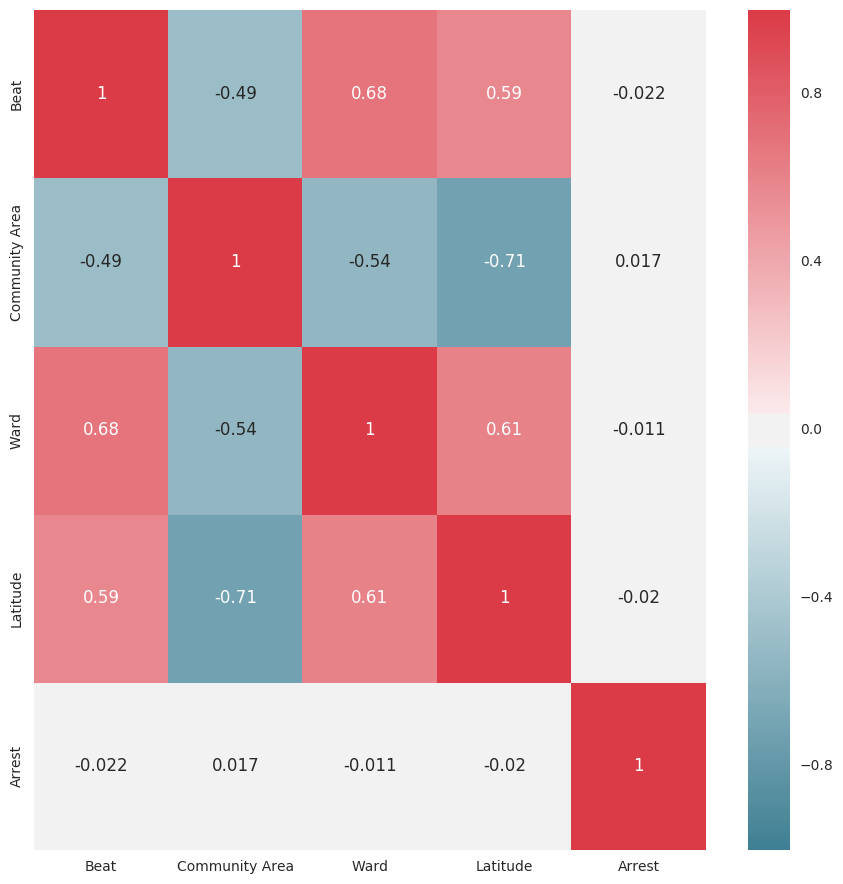

In [131]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.set(style="darkgrid") 

f, ax = plt.subplots(figsize=(9, 9))
# df_grouped = df.groupby(by=['Primary Type'])
df_sub = df[['Beat','Community Area','Ward','Latitude','Arrest']]

sns.heatmap(df_sub.corr(), cmap=cmap, annot=True)
f.tight_layout()

In [70]:
df.Beat.describe()

count    1.456714e+06
mean     1.150644e+03
std      6.916466e+02
min      1.110000e+02
25%      6.130000e+02
50%      1.024000e+03
75%      1.711000e+03
max      2.535000e+03
Name: Beat, dtype: float64

count       33
unique      33
top       2649
freq         1
Name: Arrest, dtype: object


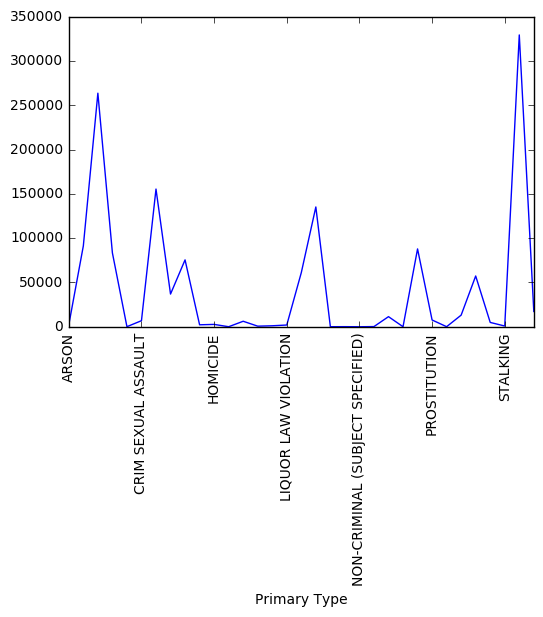

In [10]:
df_grouped = df.groupby(by="Primary Type")
arrests = df_grouped.Arrest.count()
print(arrests.apply(str).describe())

# df['counts']
# df['counts'] = Series(arrests, index=df1.index)
# df['counts']
# ax = sns.regplot(x="Latitude", y="counts", data=df)

# df1 = pd.DataFrame()
# df1['type'] = df['Primary Type']
# df1.join(arrests)
# plt.scatter(arrests.index, arrests)
arrests.plot(rot=90)
# result = df.sort(column = 0, ascending=True)


In [7]:
tokens = [x.split() for x in df['Date'].values ]
days = [x[0] for x in tokens]
datestokens = [x.split("/") for x in days]
day_in_month = [x[1] for x in datestokens]
month = [x[0] for x in datestokens]
year = [x[2] for x in datestokens]



# test = grouped.day_in_month.count()
# print(test.apply(str).describe())



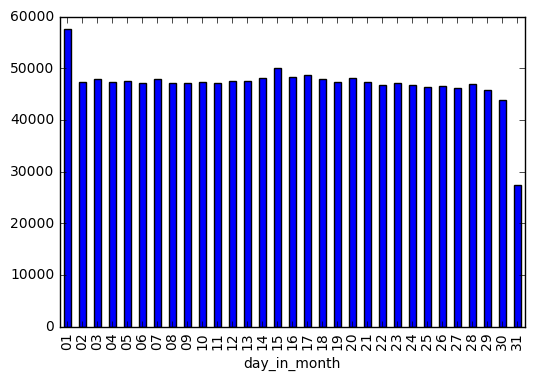

In [10]:
df['day_in_month'] = day_in_month
df['month'] = month
df['year'] = year
grouped = df.groupby(by="day_in_month")
blah = grouped.Arrest.count()
ax = blah.plot(kind = 'bar')

/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1377242.0, right=1377242.0
  'left=%s, right=%s') % (left, right))
/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=661921.0, right=661921.0
  'left=%s, right=%s') % (left, right))
/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=382586.0, right=382586.0
  'left=%s, right=%s') % (left, right))
/Users/rupalsanghavi/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transforma

KeyboardInterrupt: 

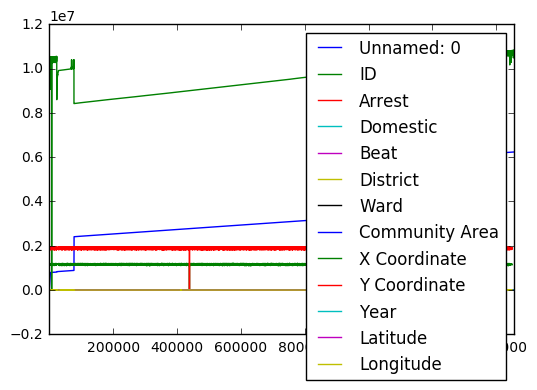

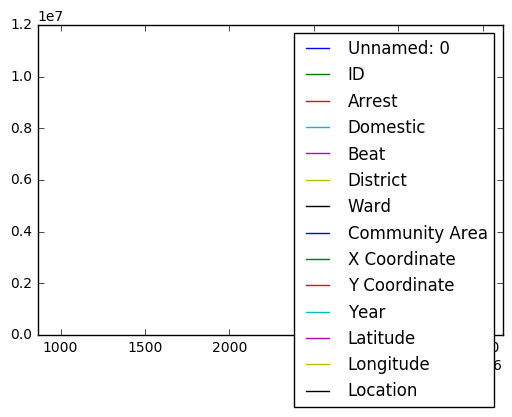

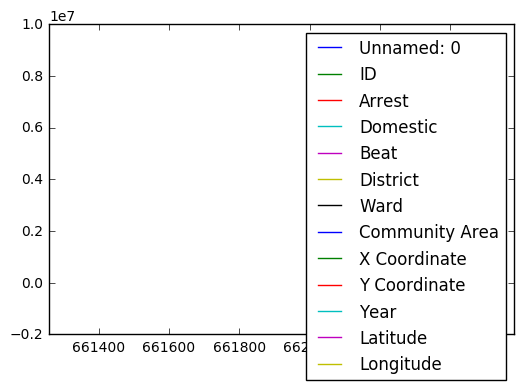

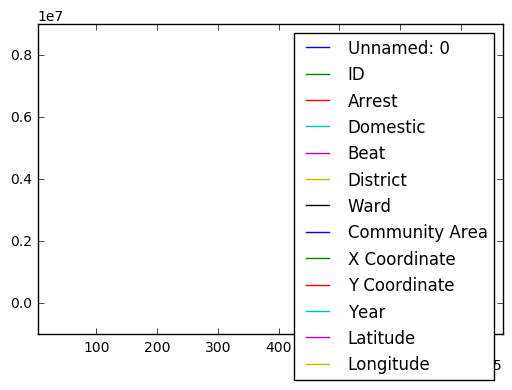

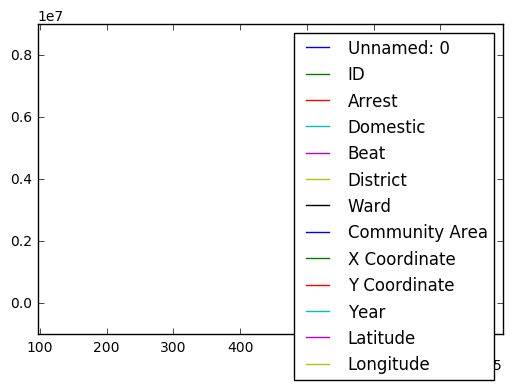

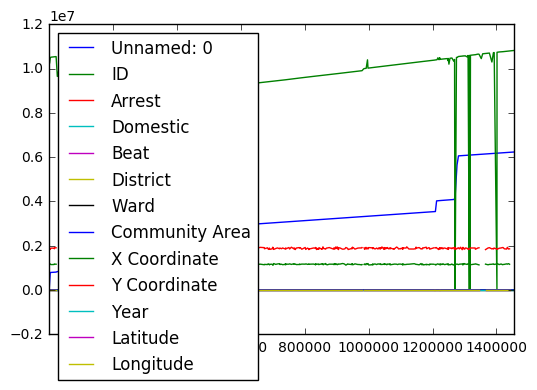

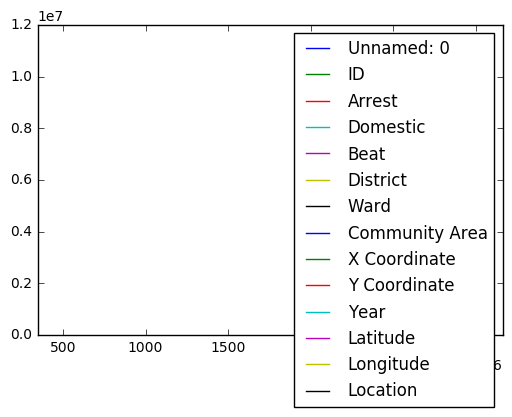

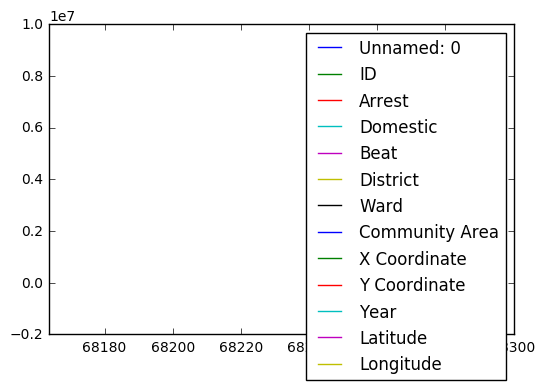

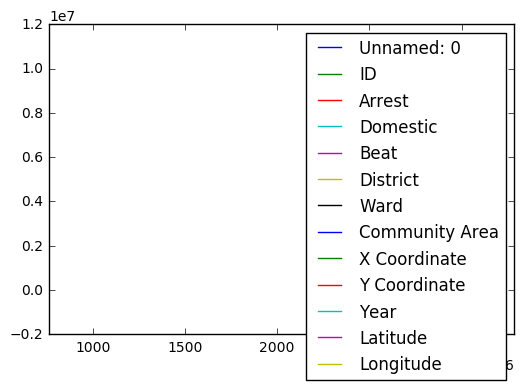

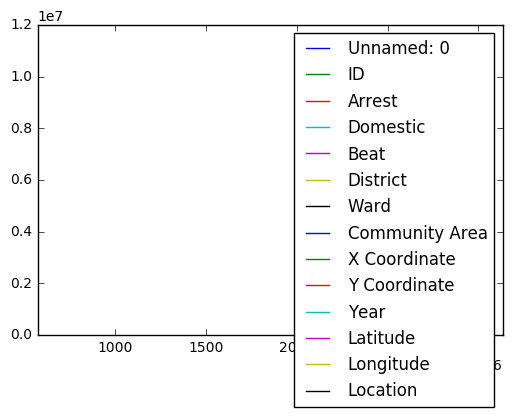

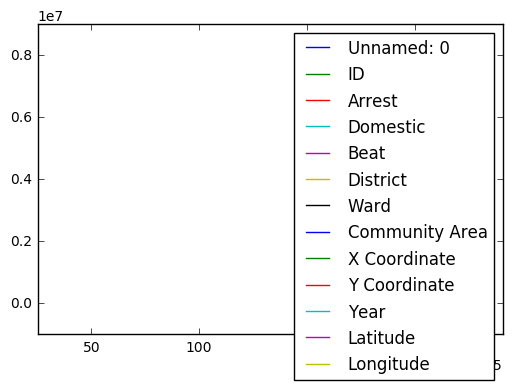

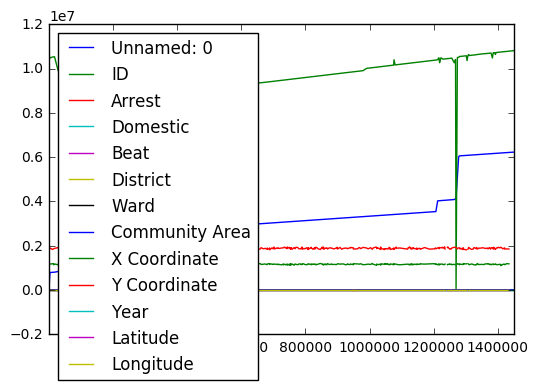

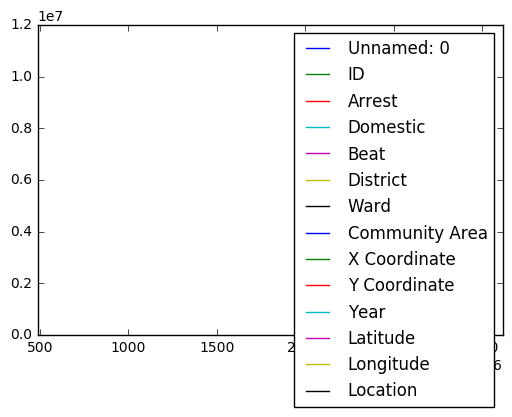

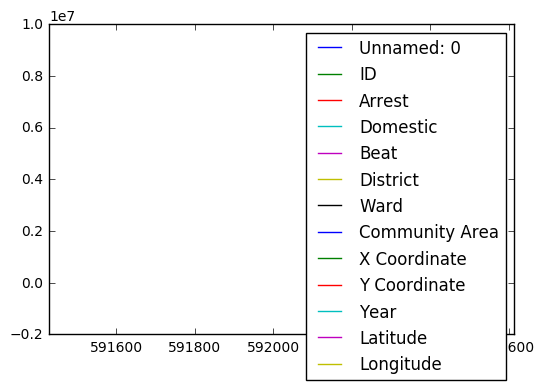

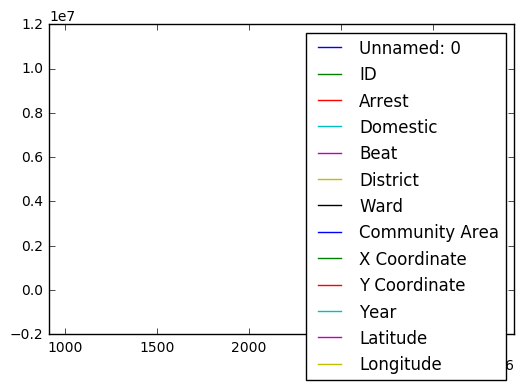

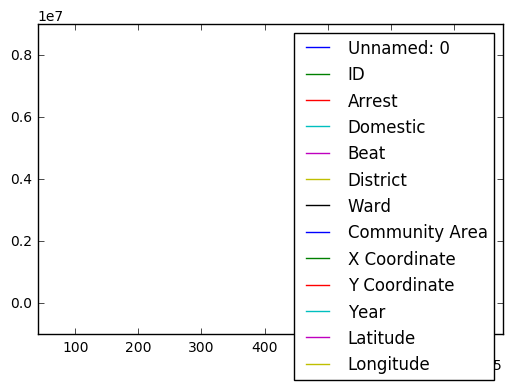

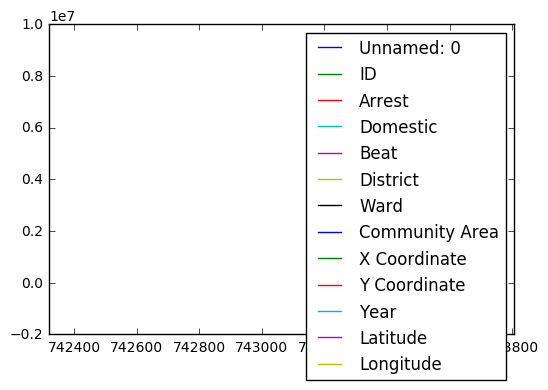

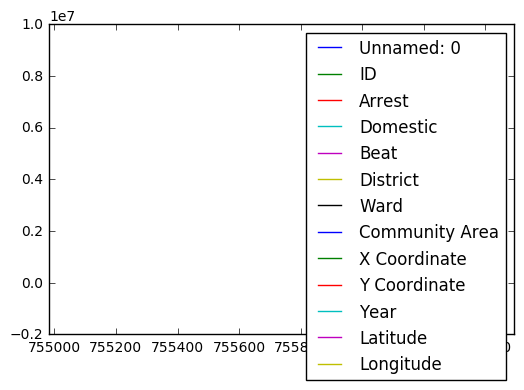

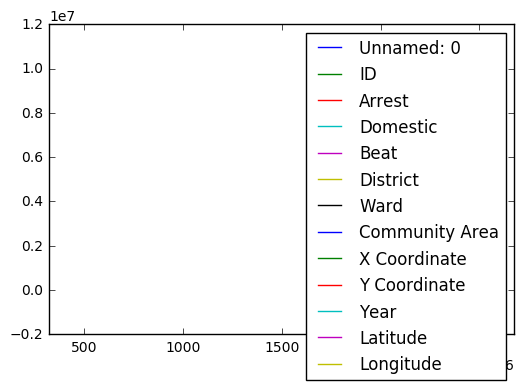

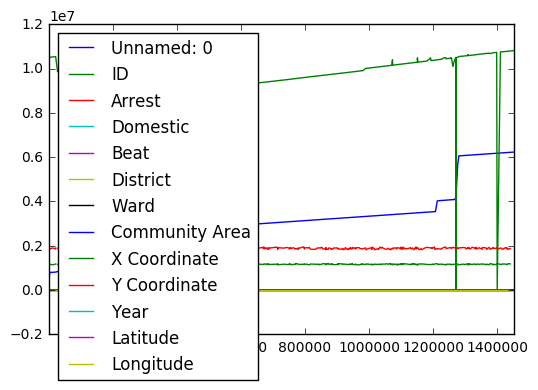

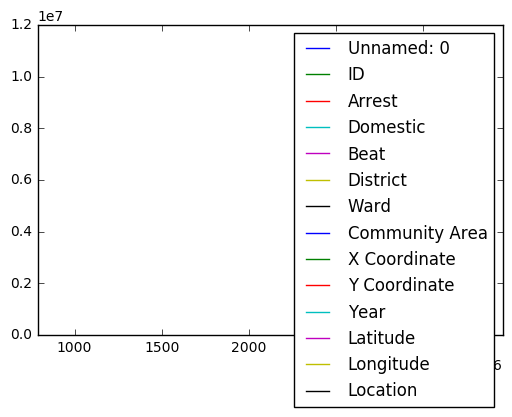

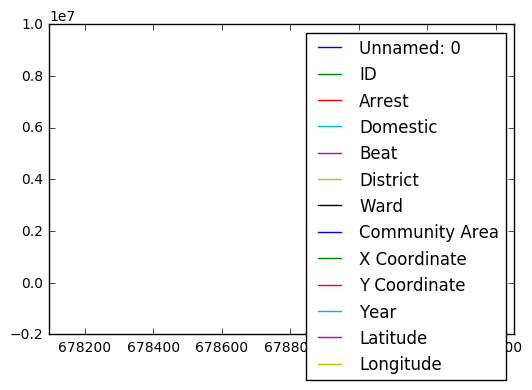

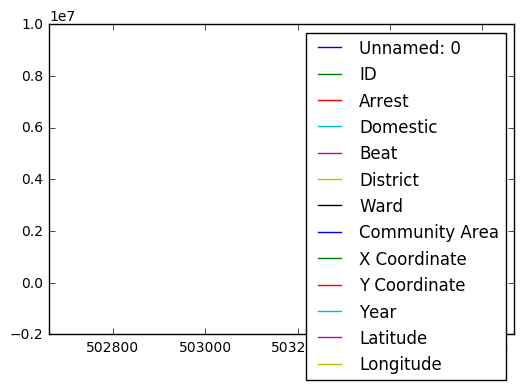

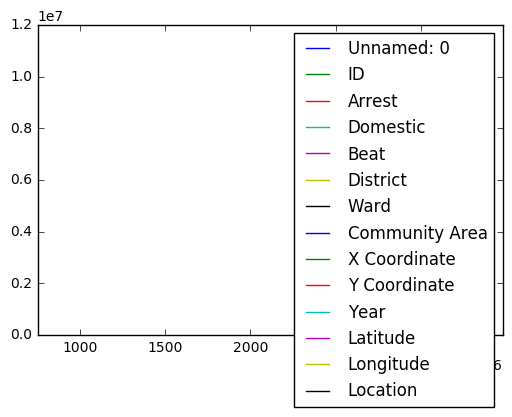

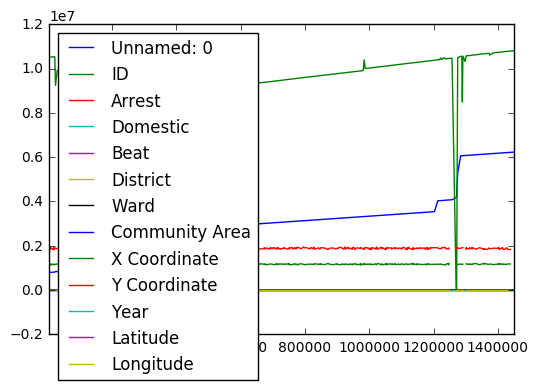

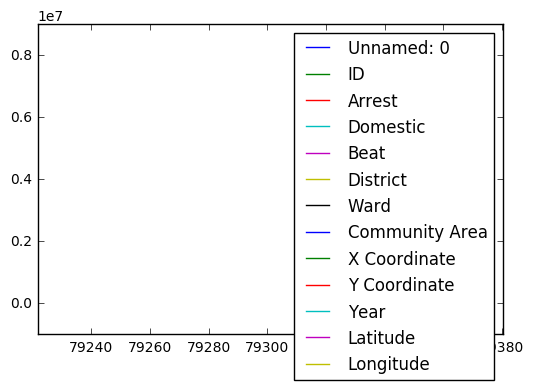

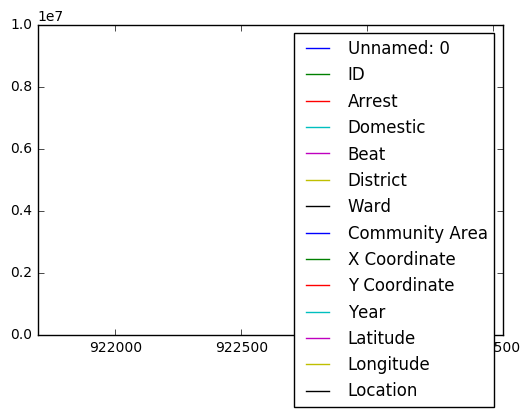

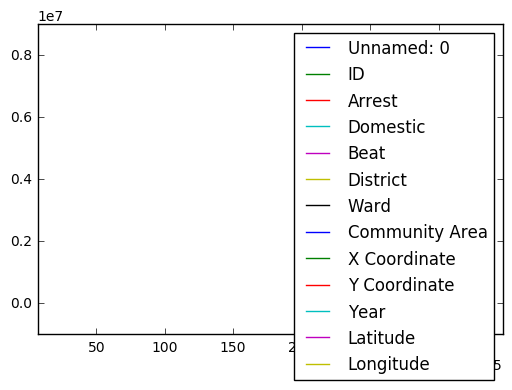

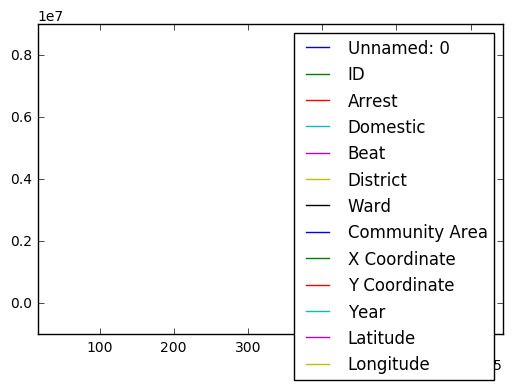

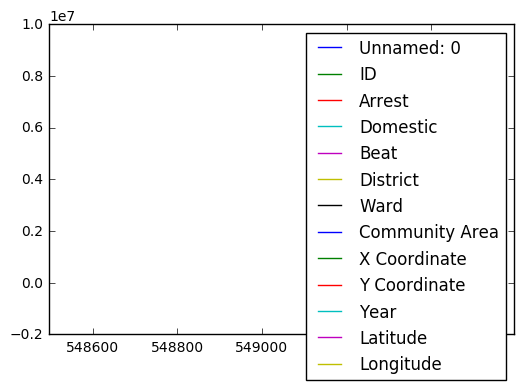

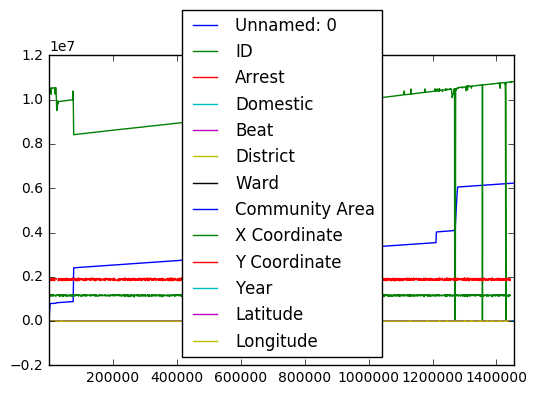

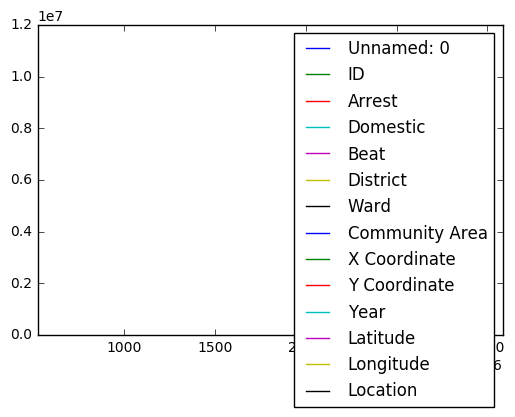

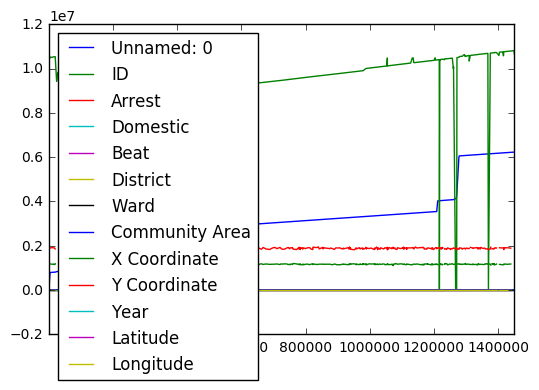

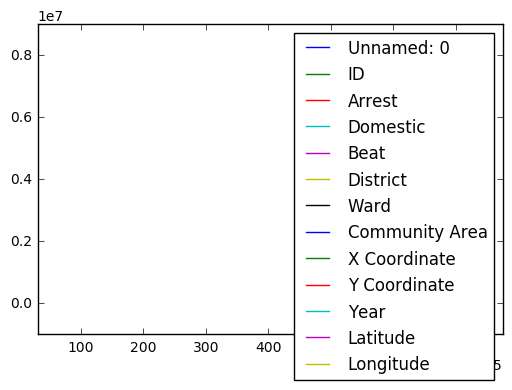

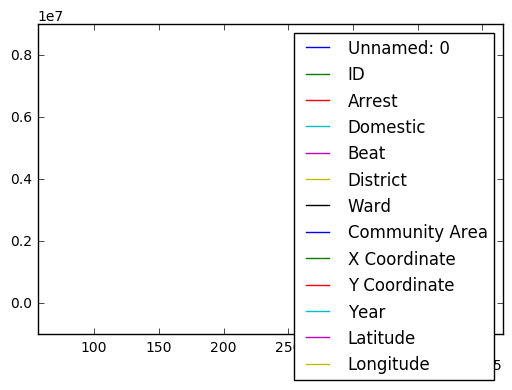

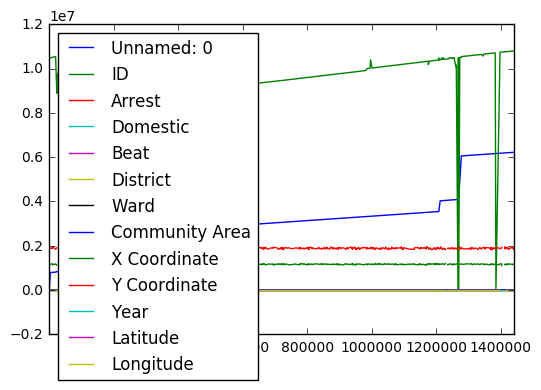

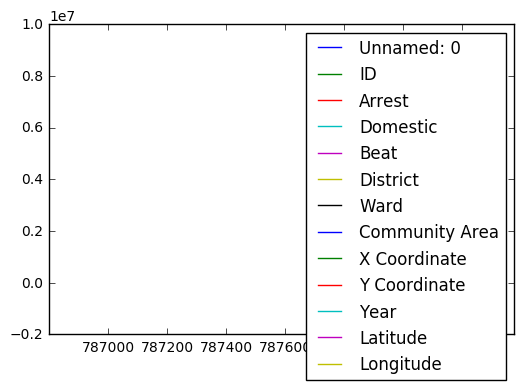

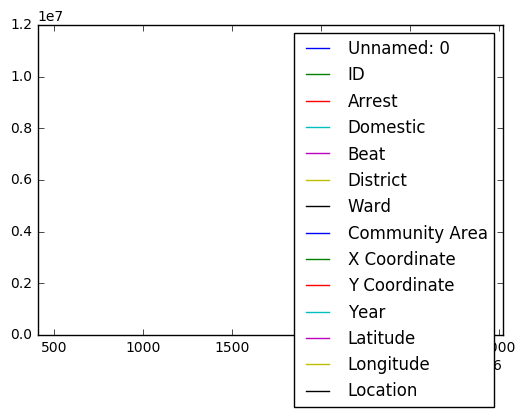

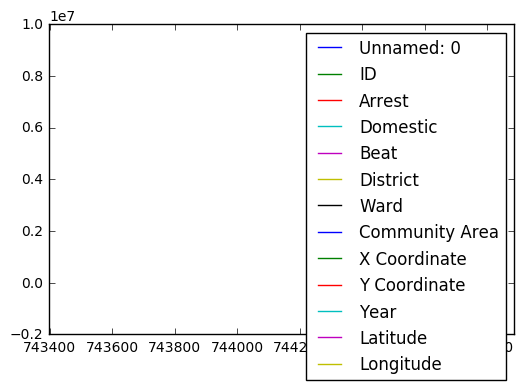

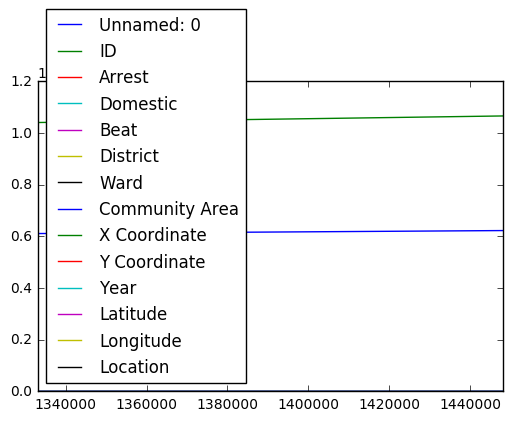

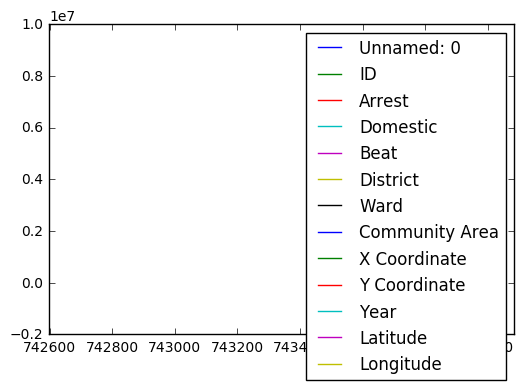

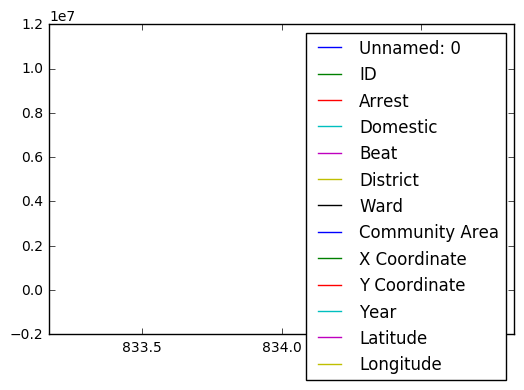

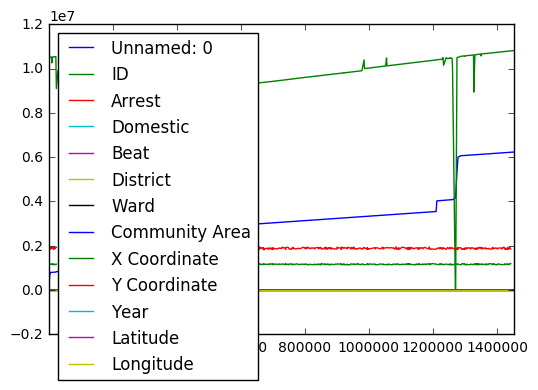

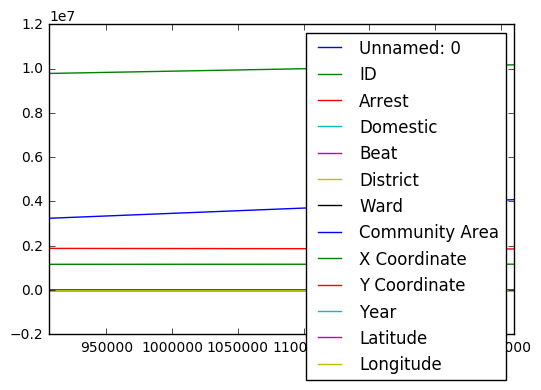

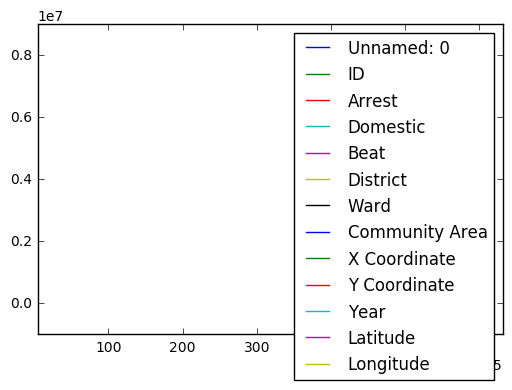

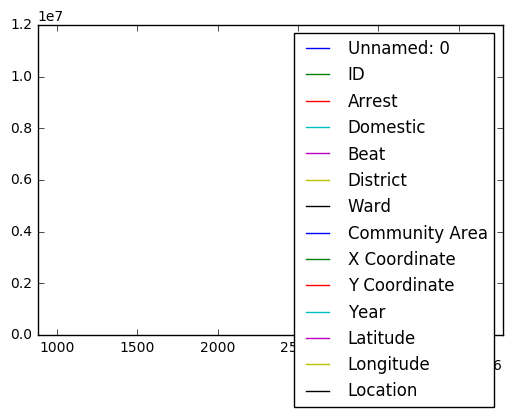

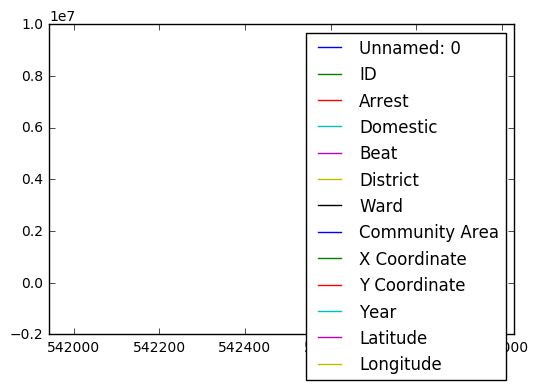

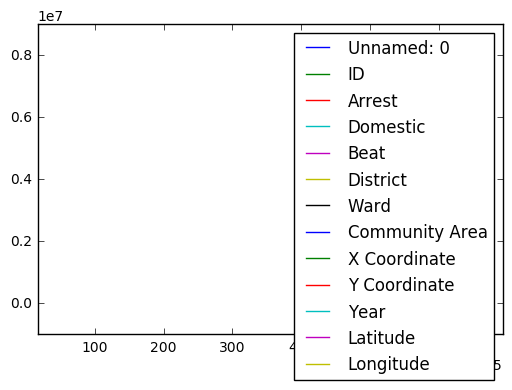

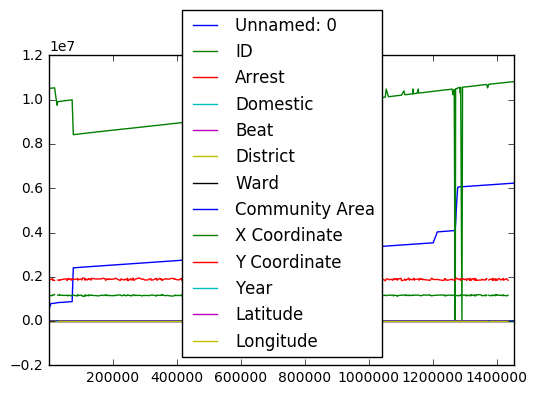

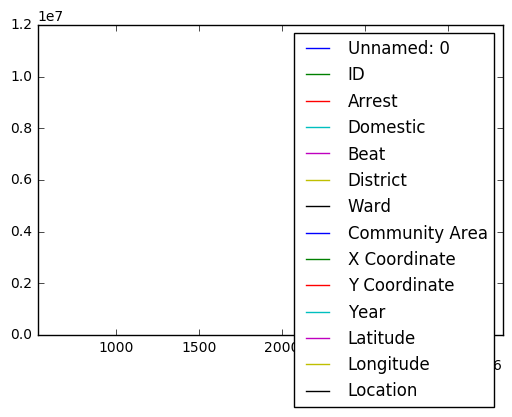

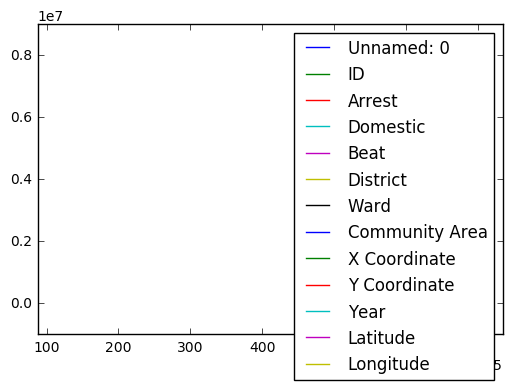

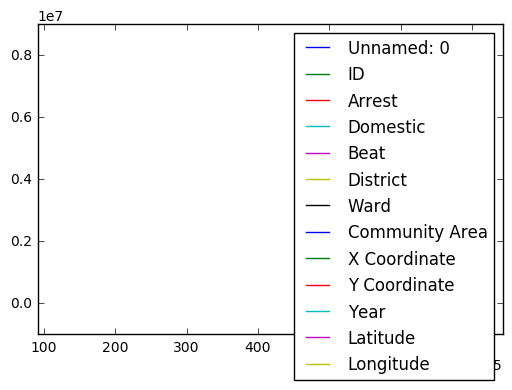

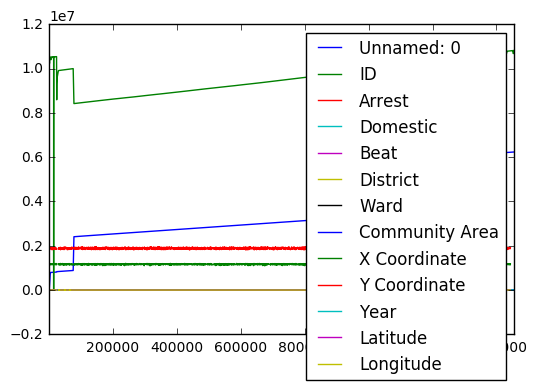

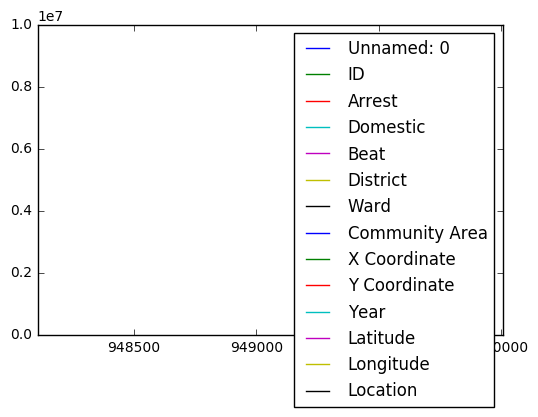

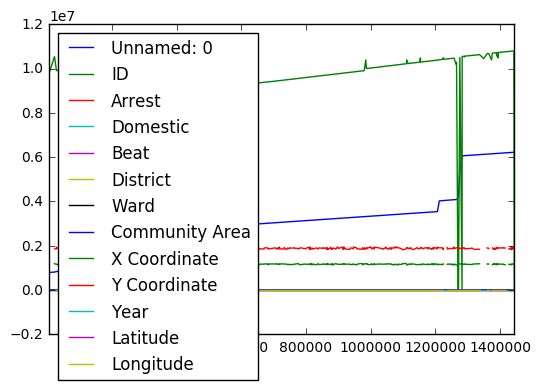

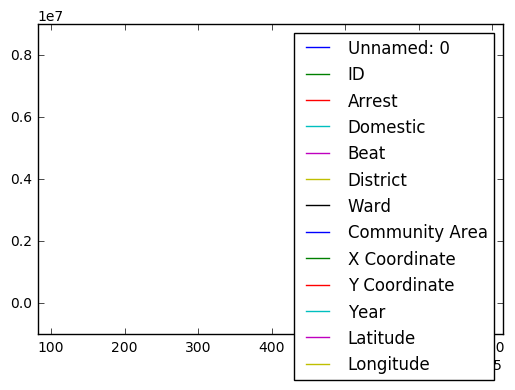

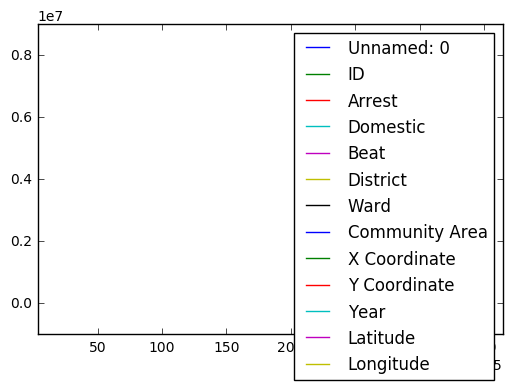

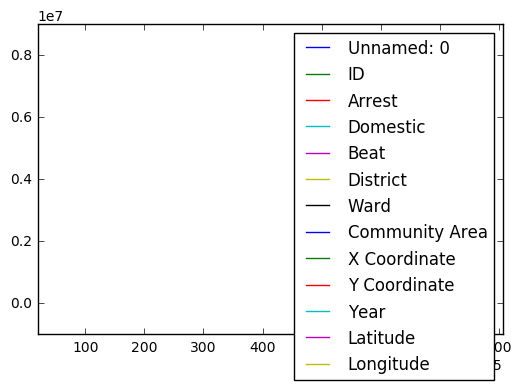

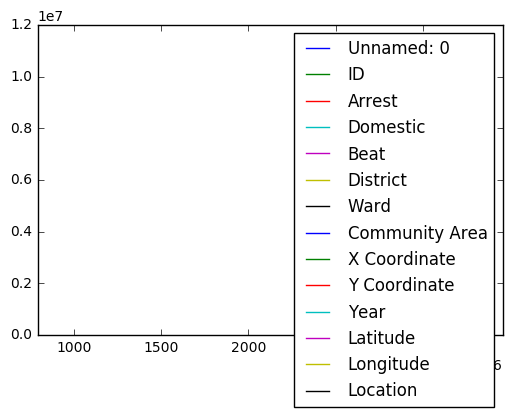

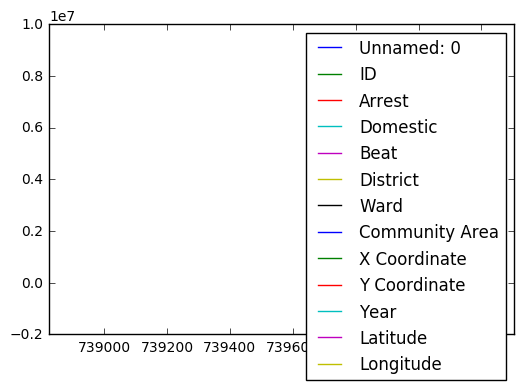

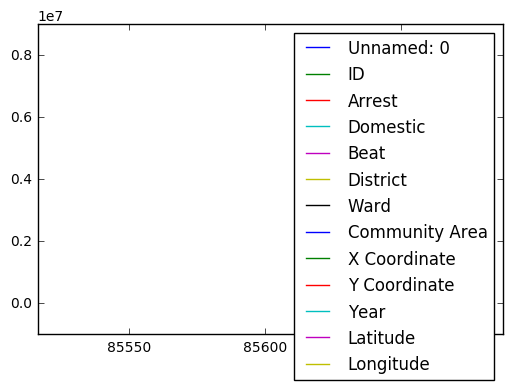

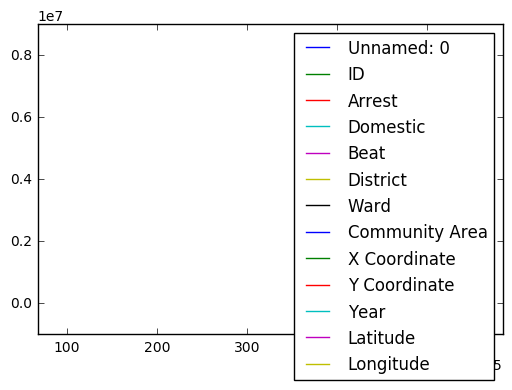

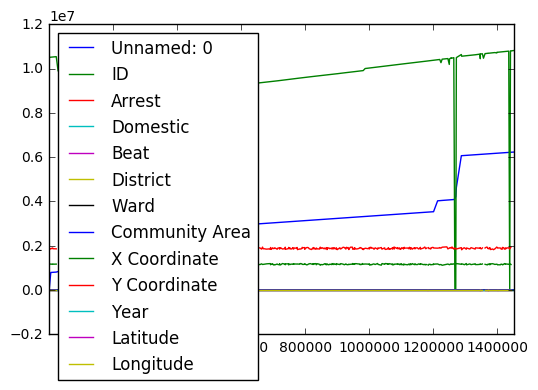

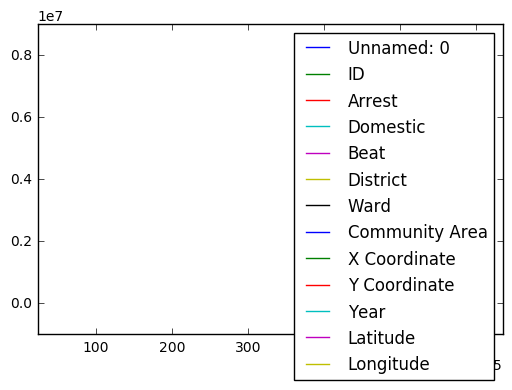

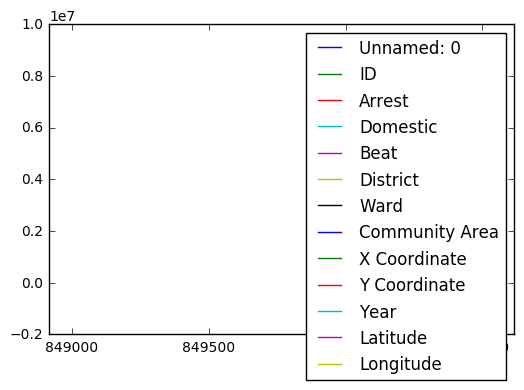

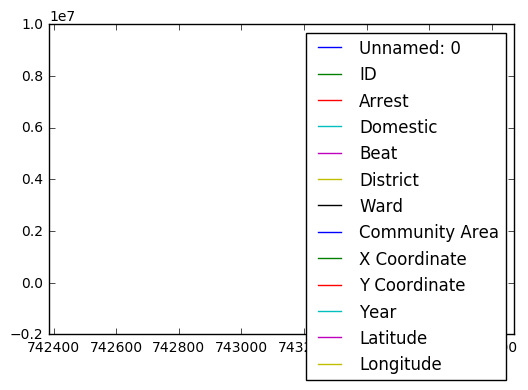

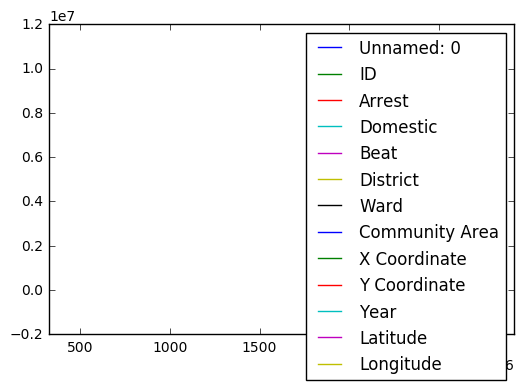

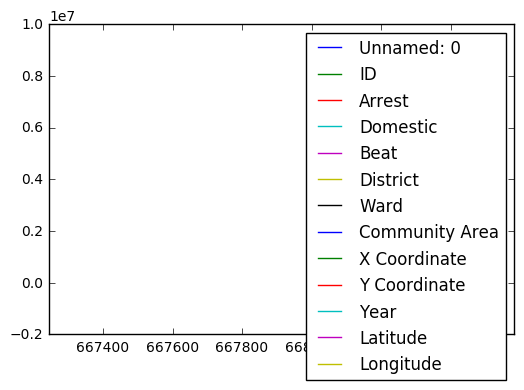

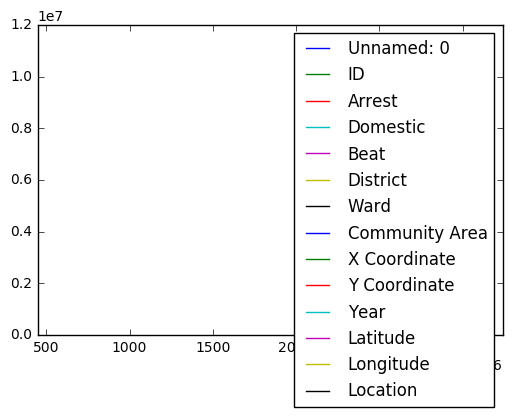

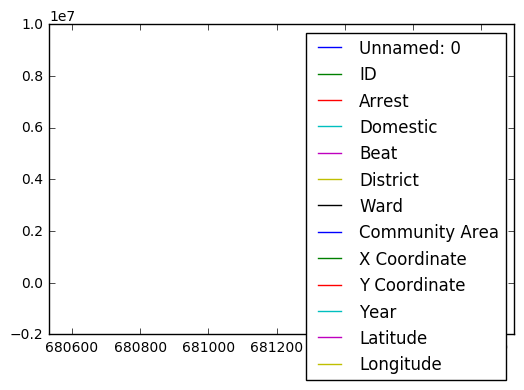

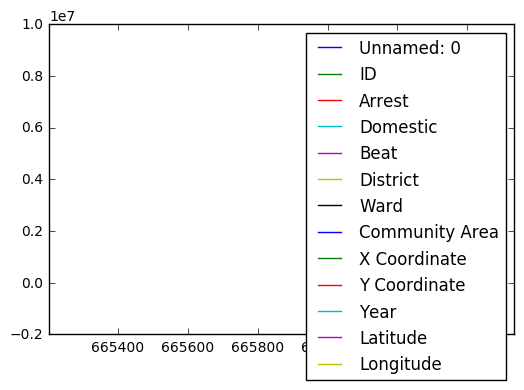

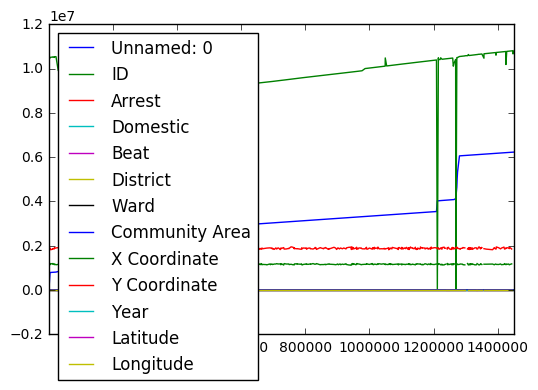

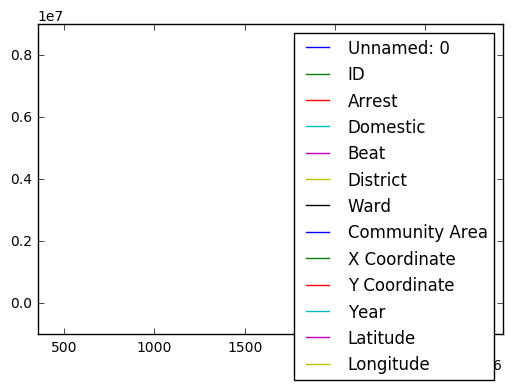

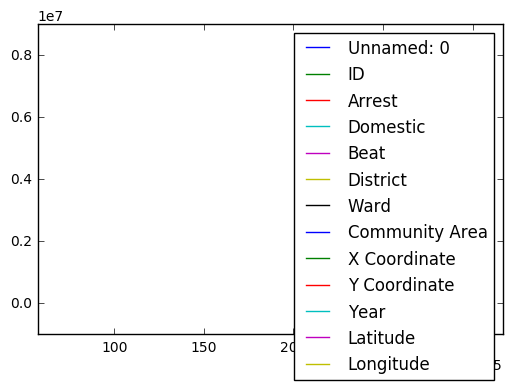

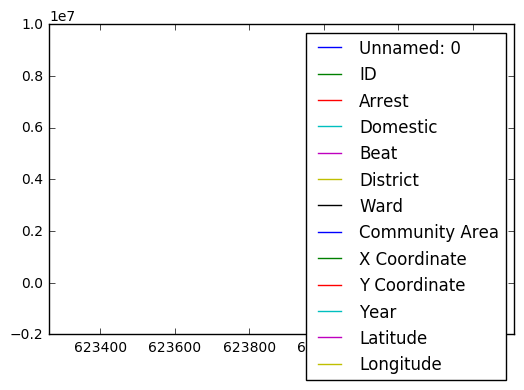

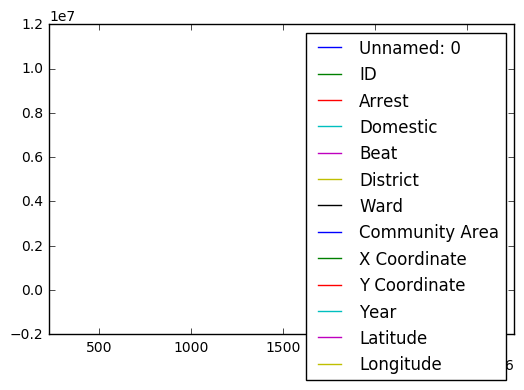

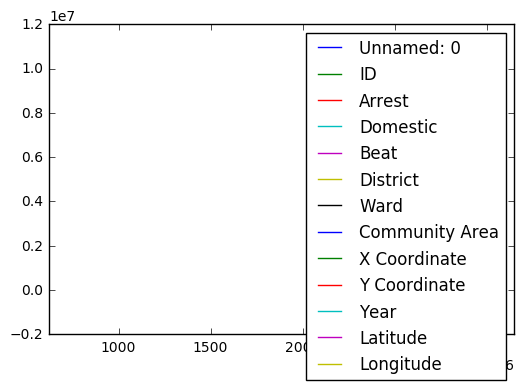

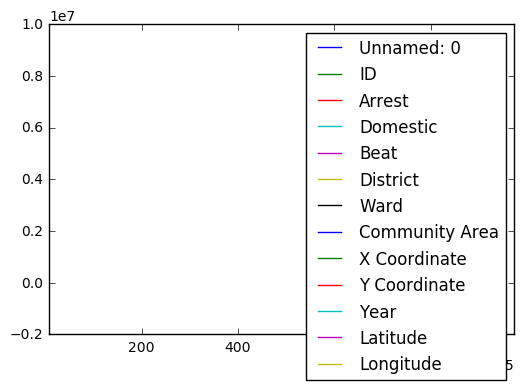

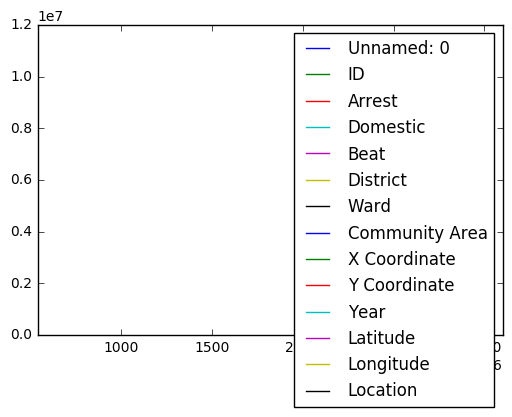

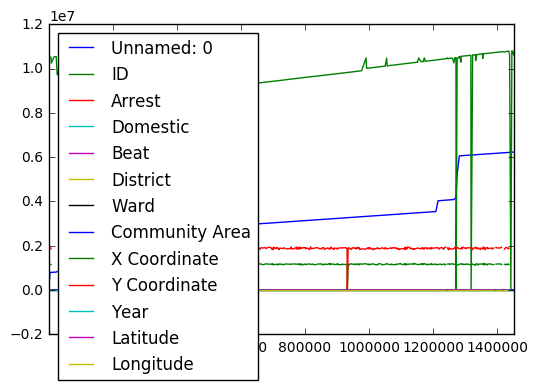

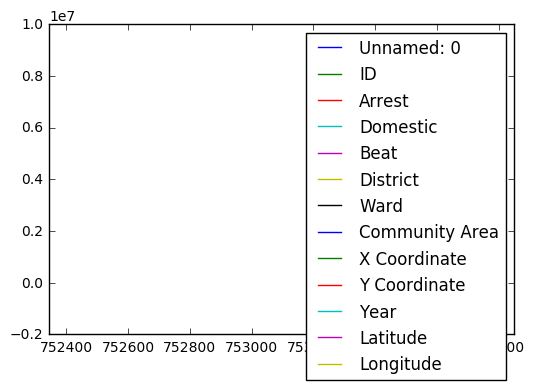

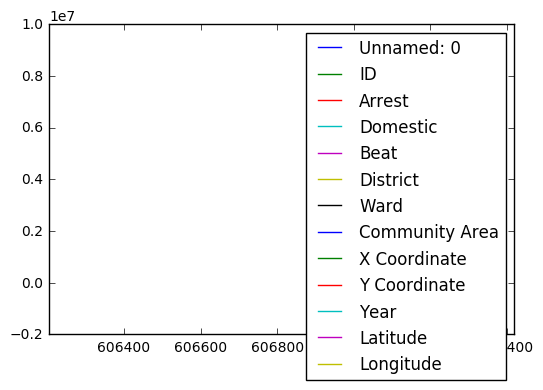

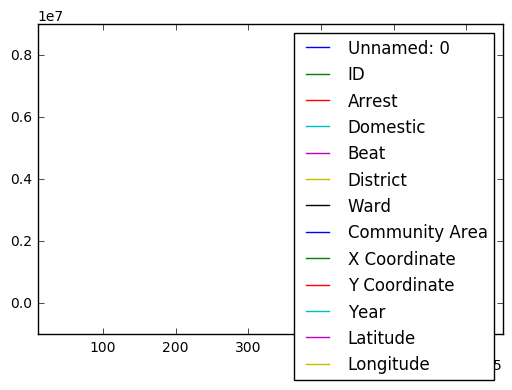

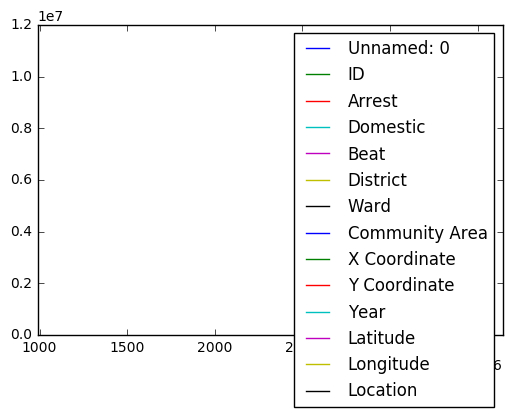

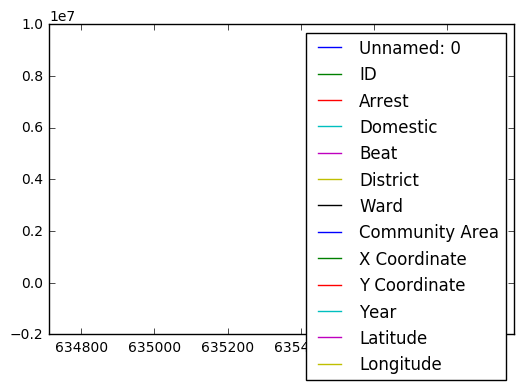

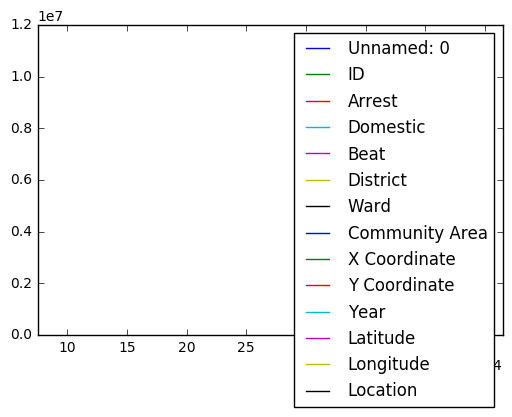

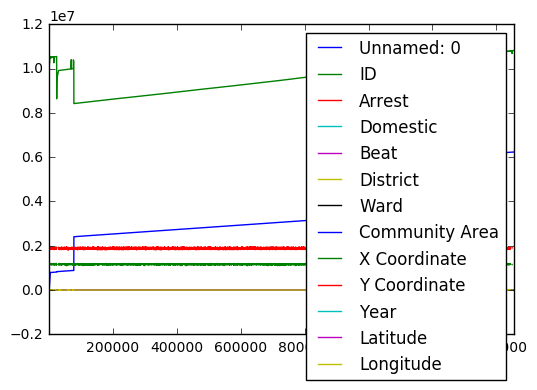

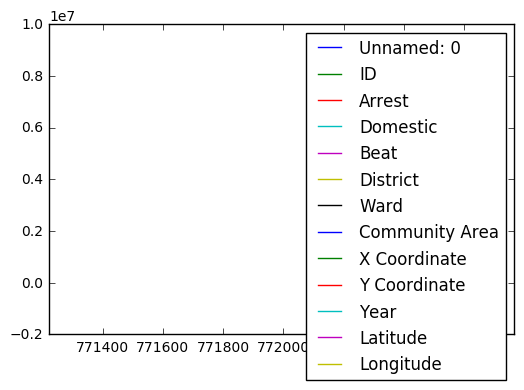

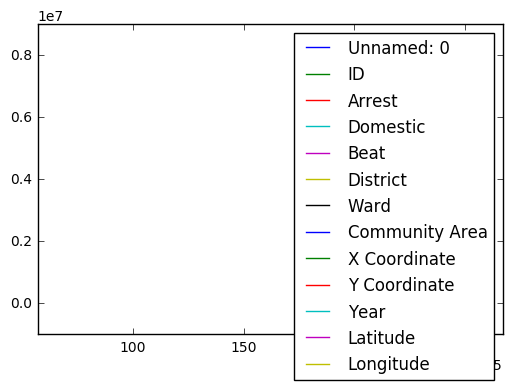

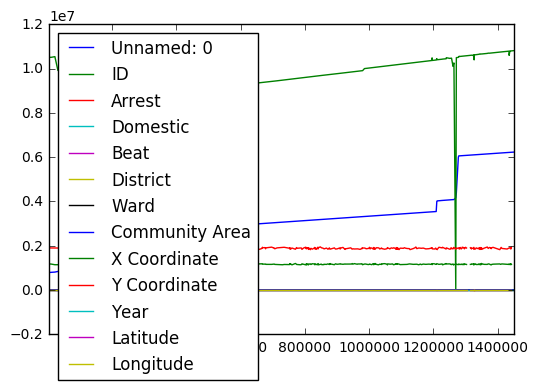

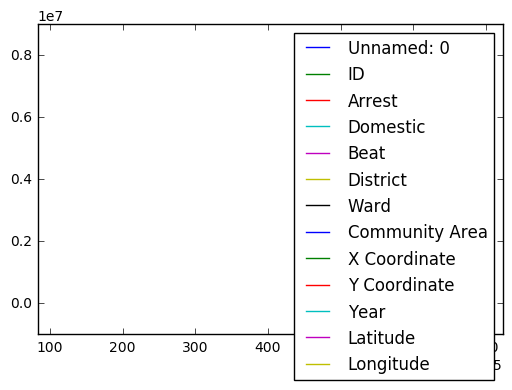

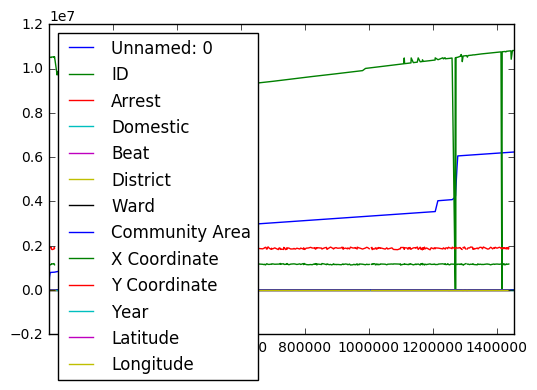

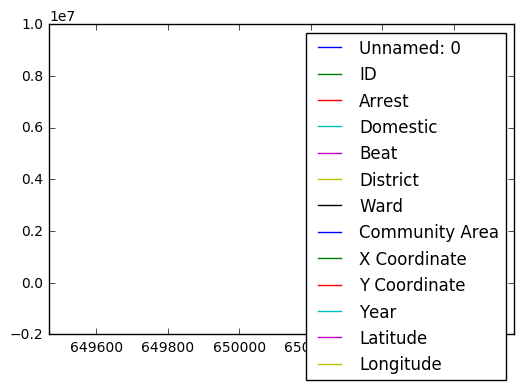

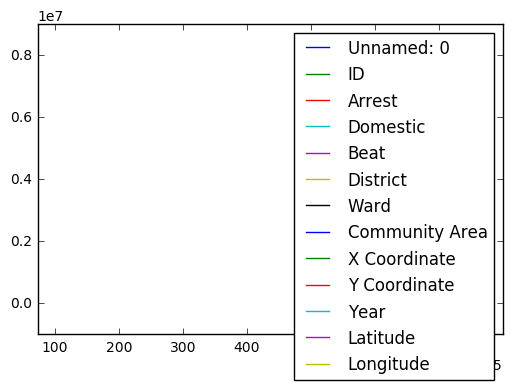

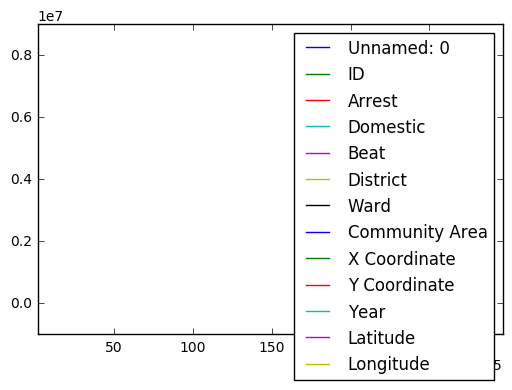

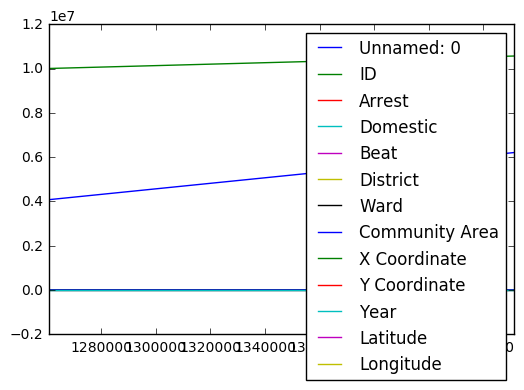

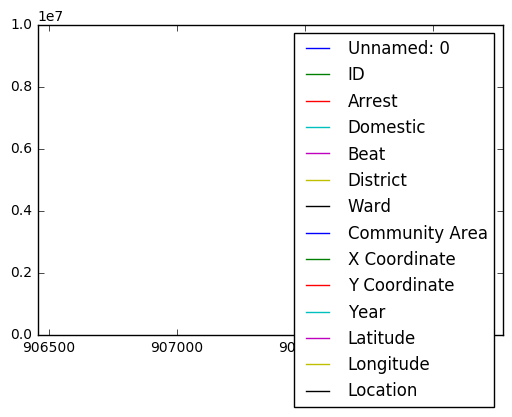

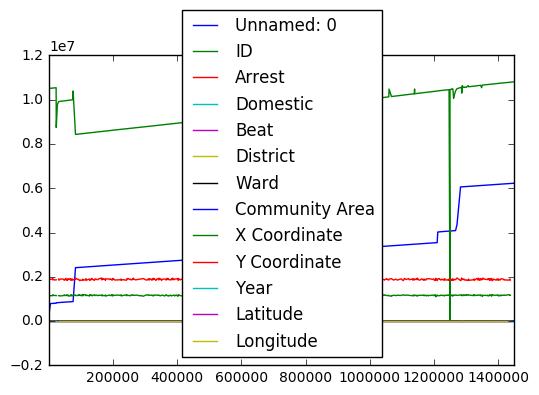

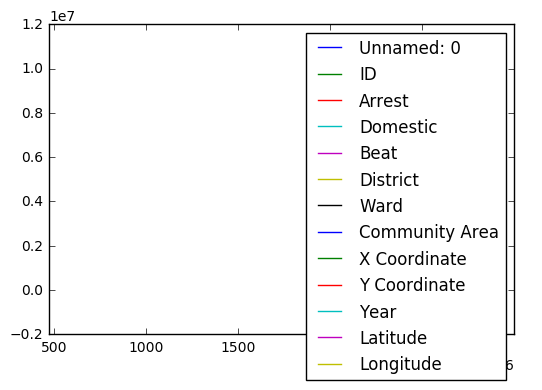

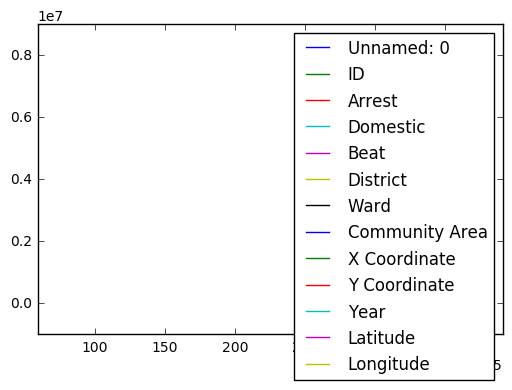

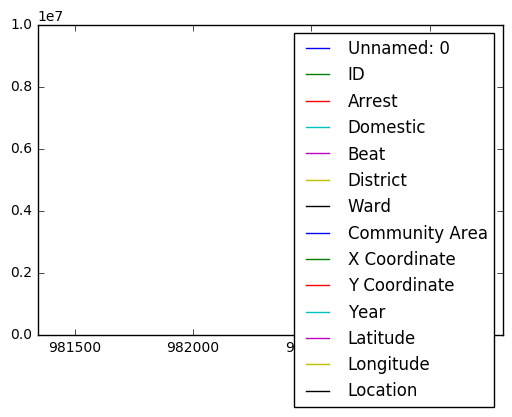

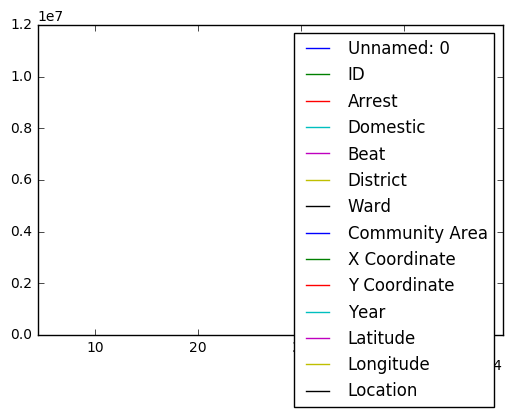

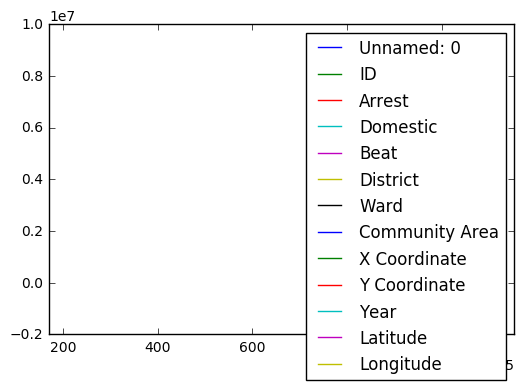

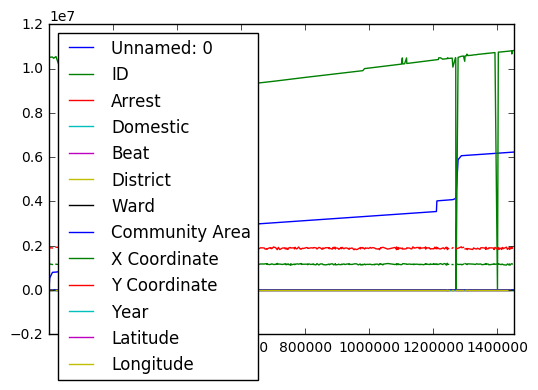

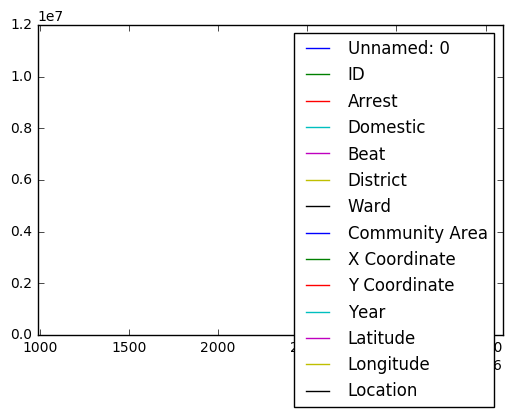

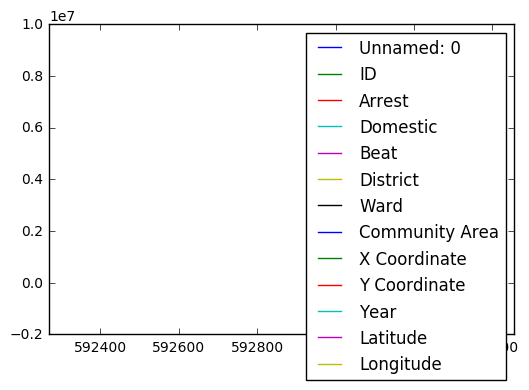

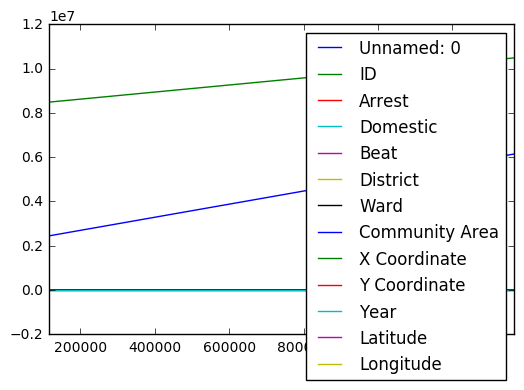

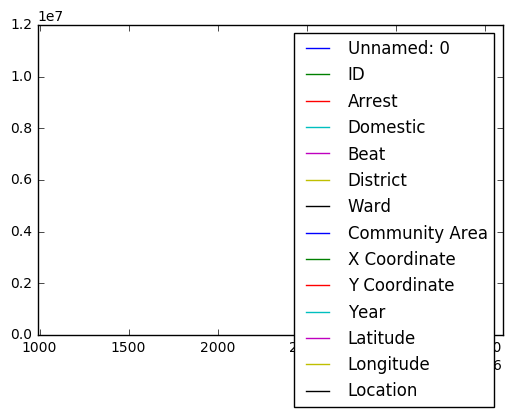

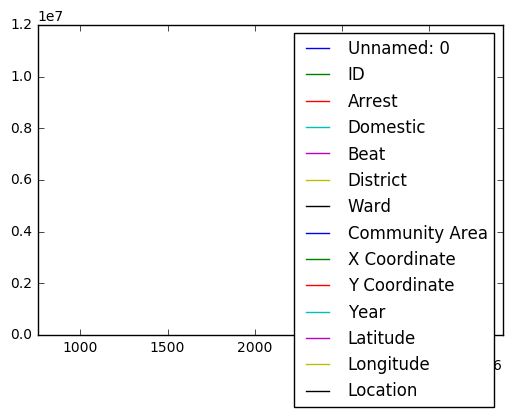

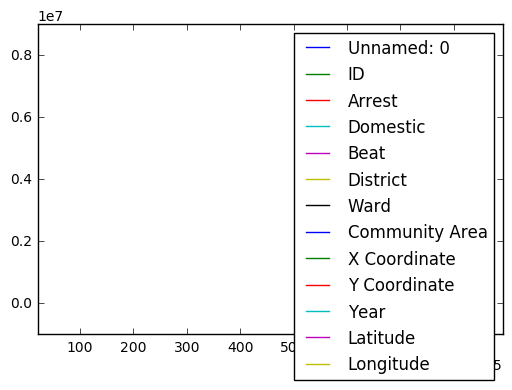

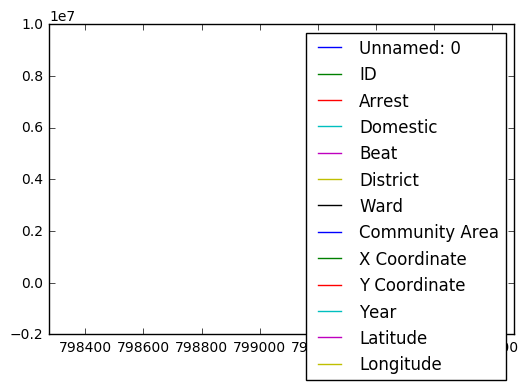

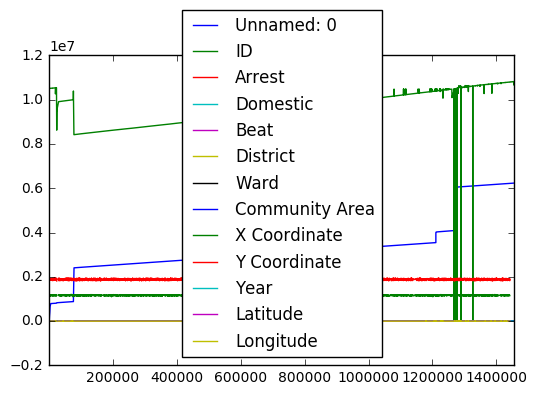

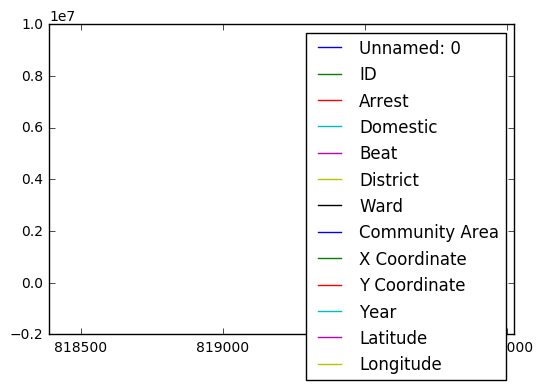

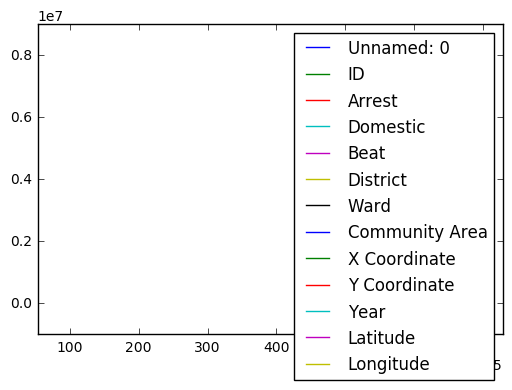

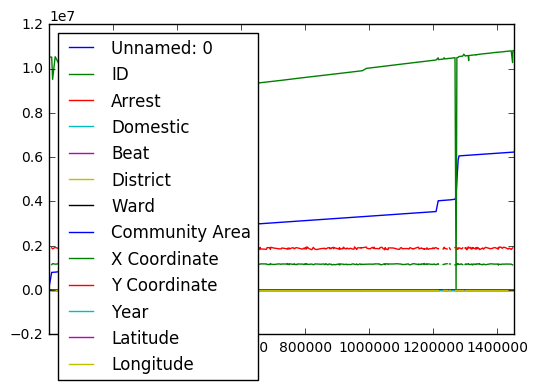

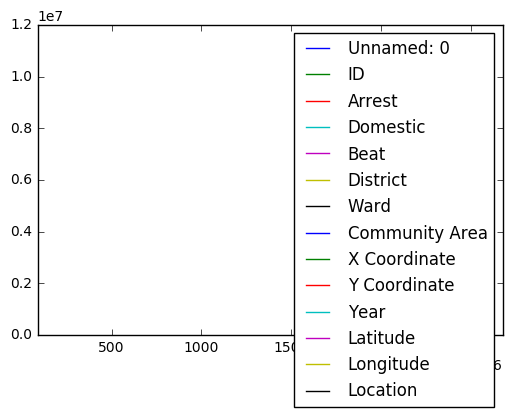

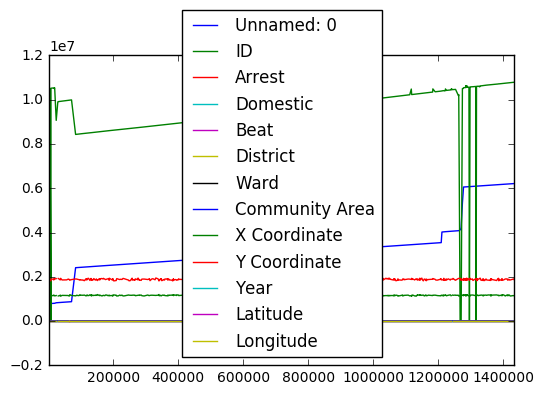

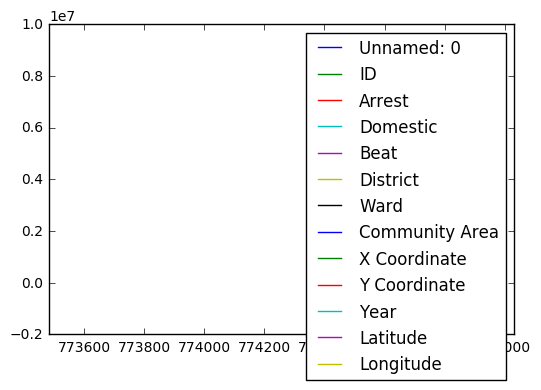

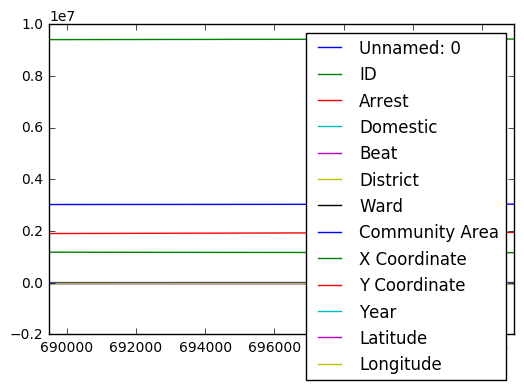

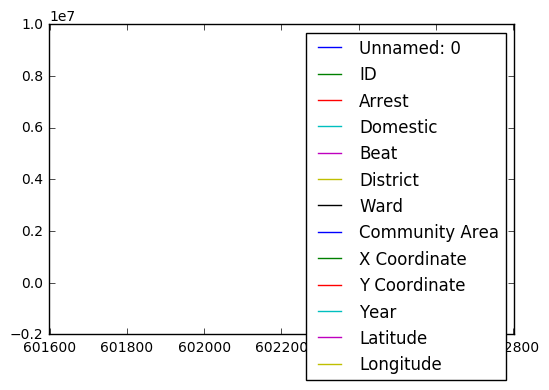

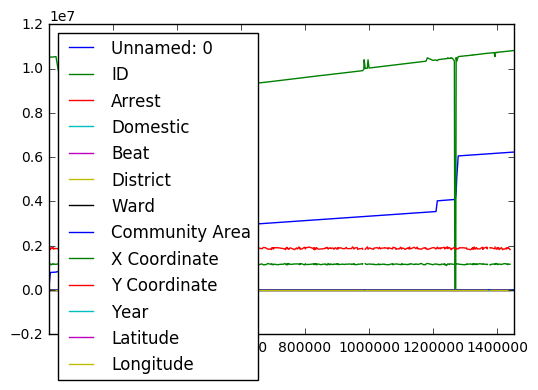

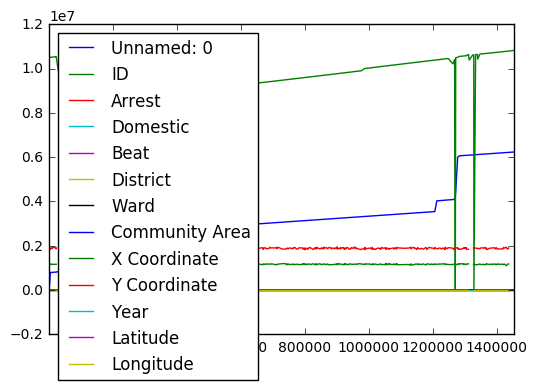

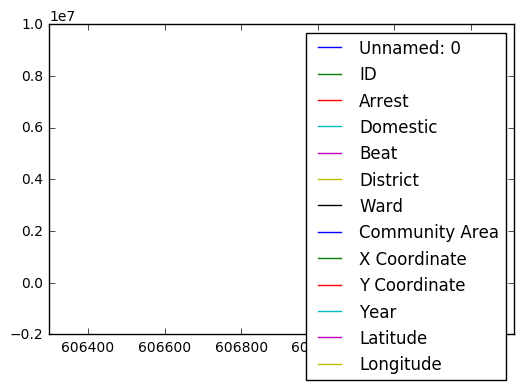

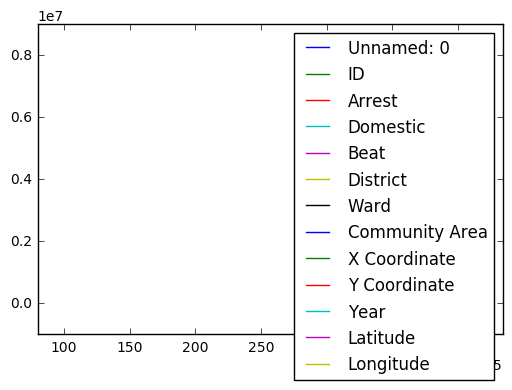

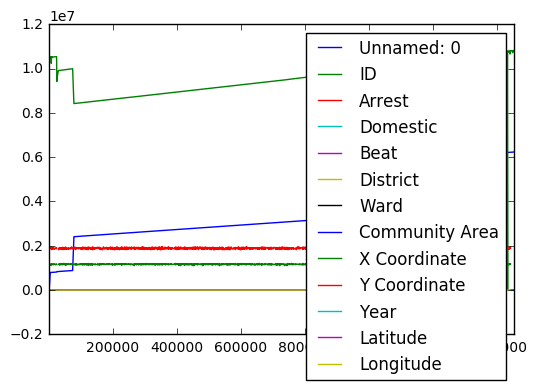

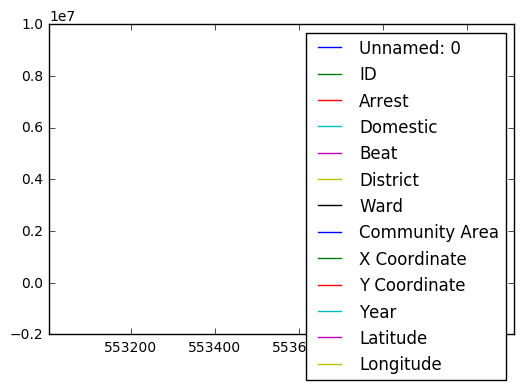

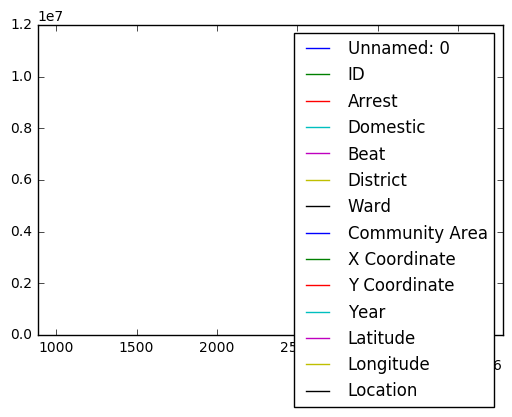

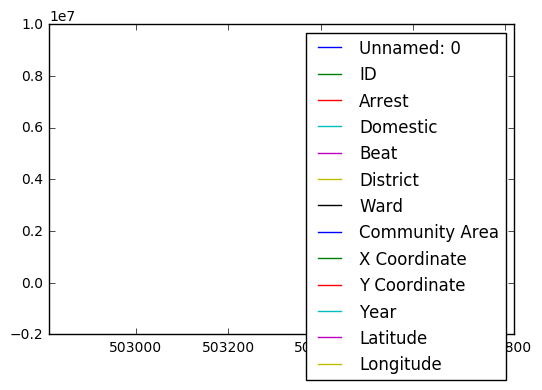

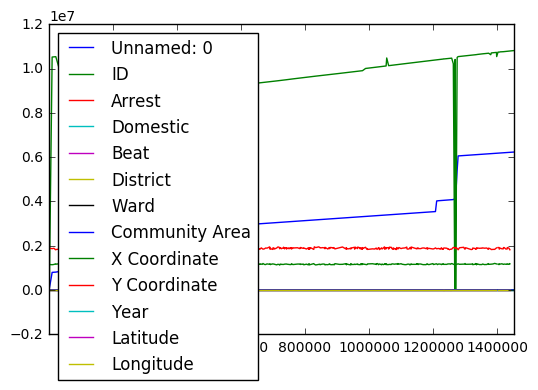

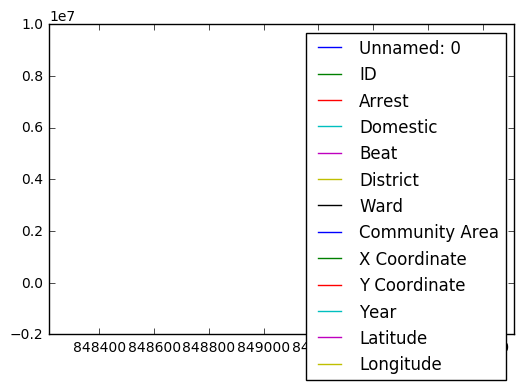

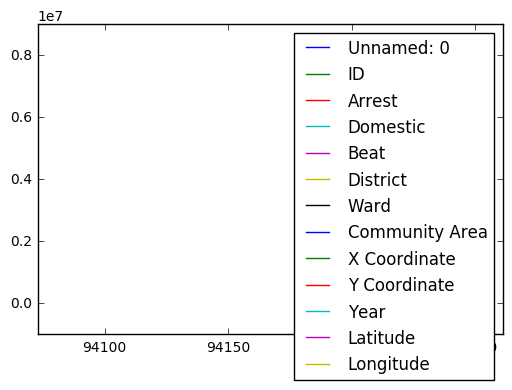

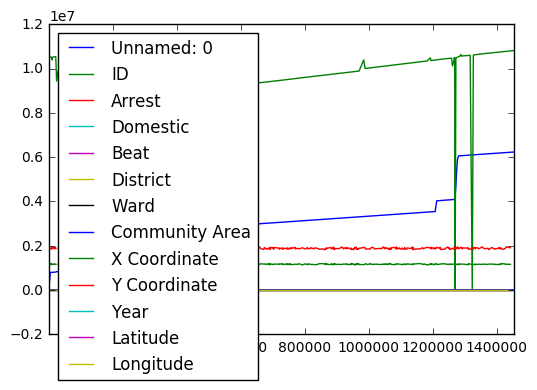

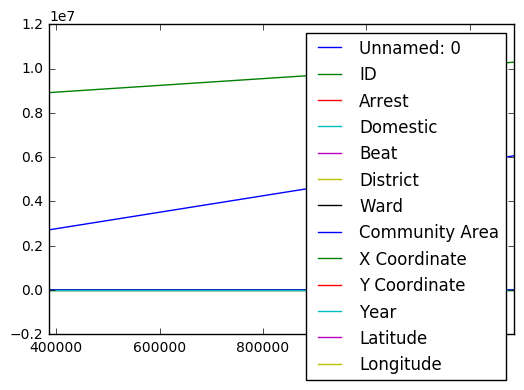

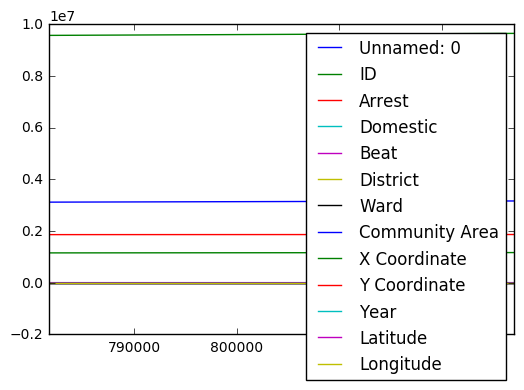

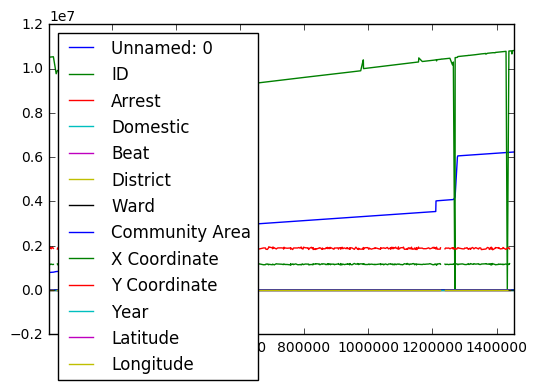

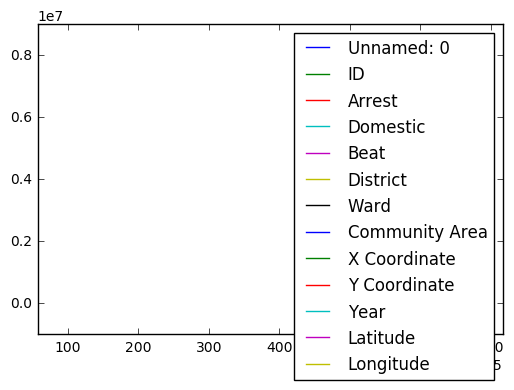

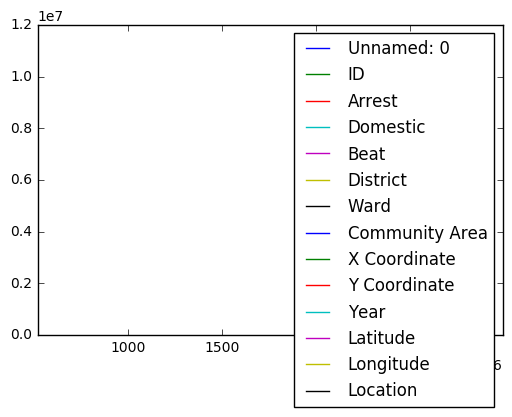

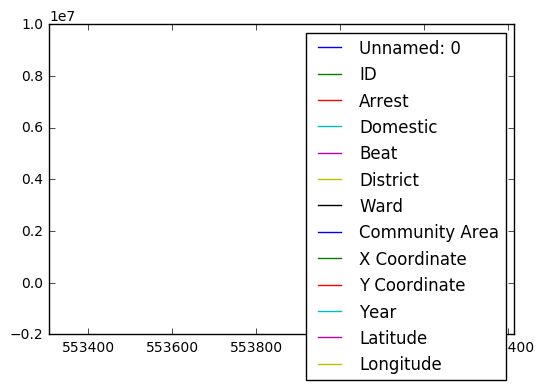

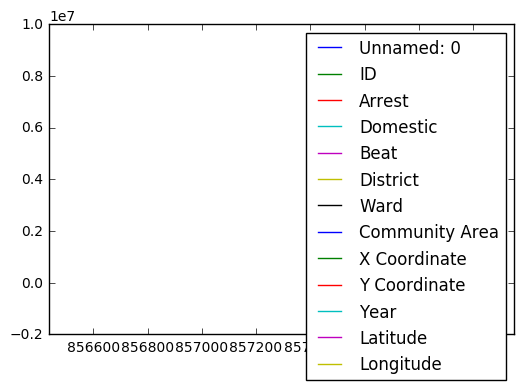

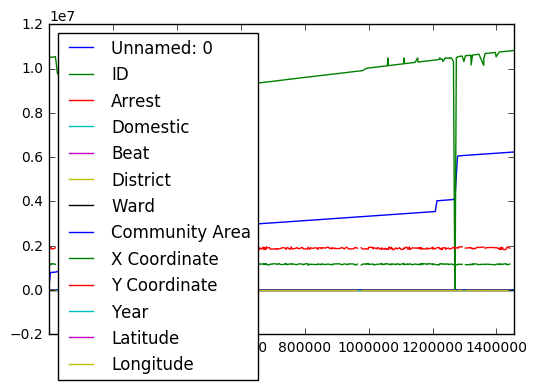

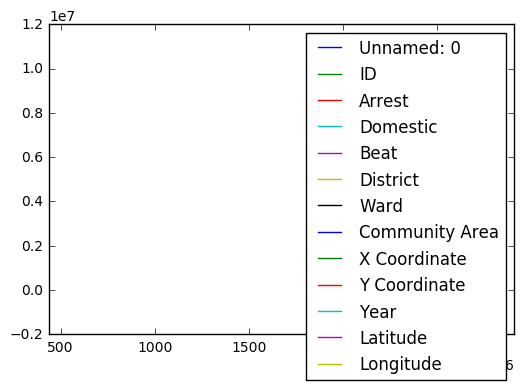

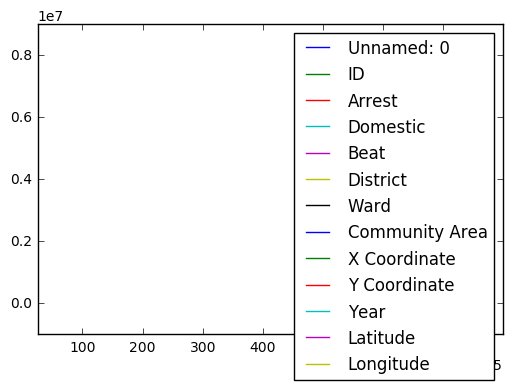

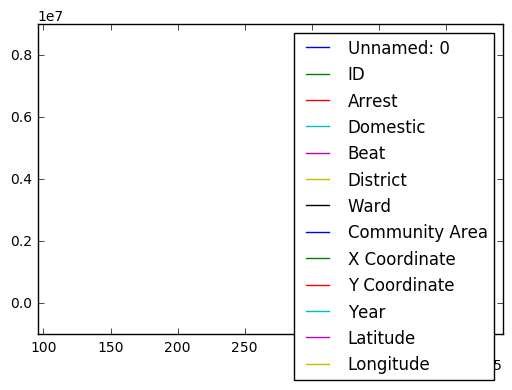

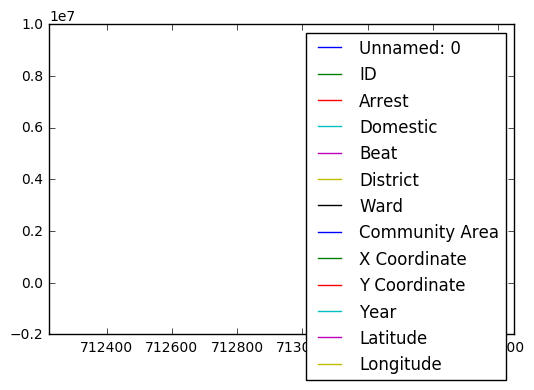

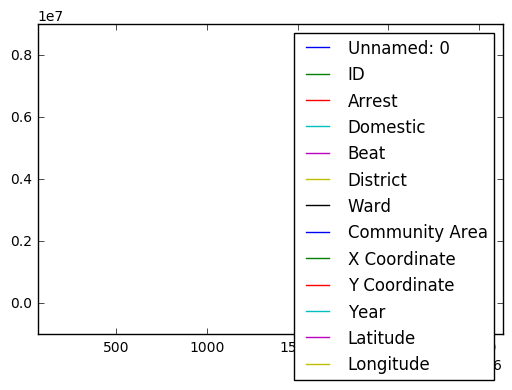

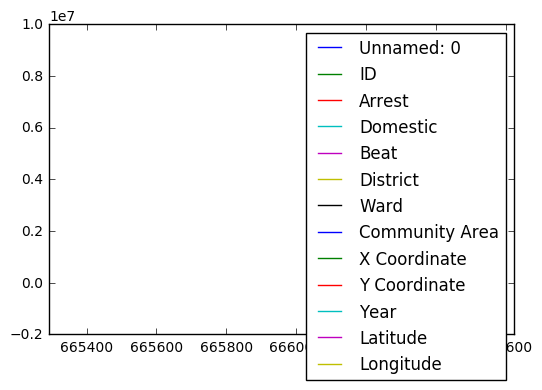

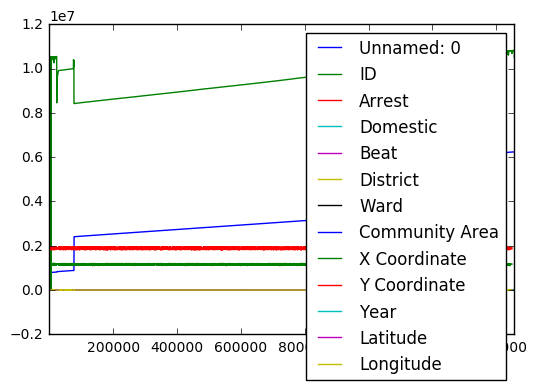

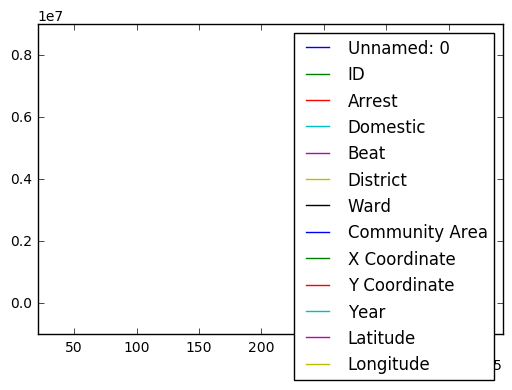

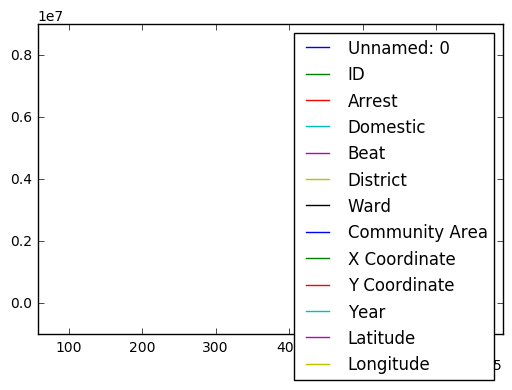

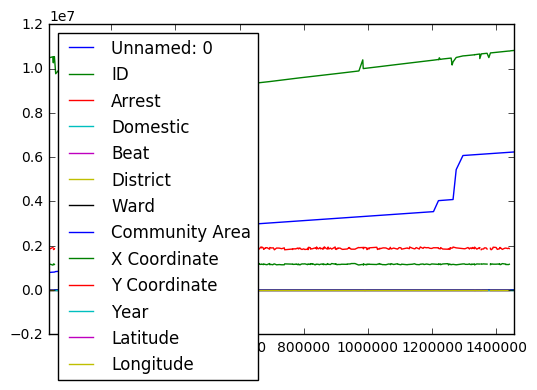

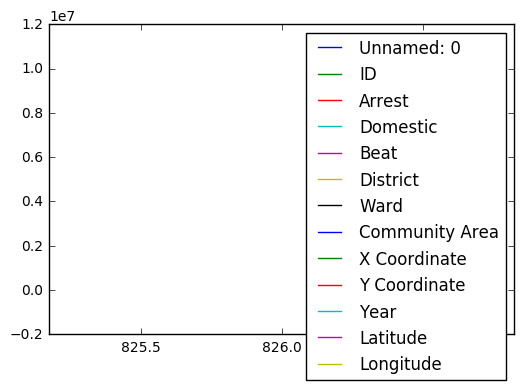

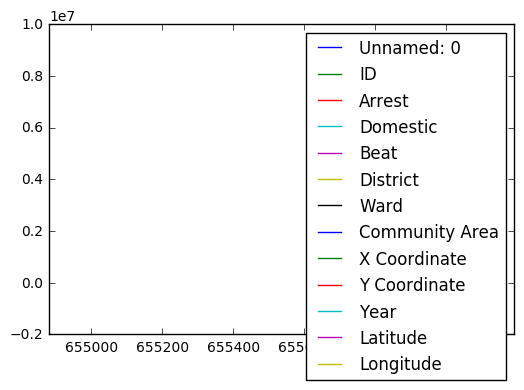

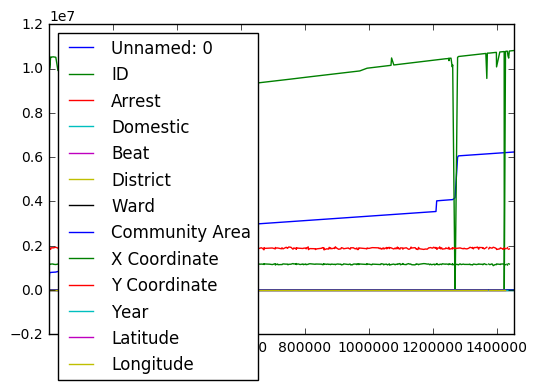

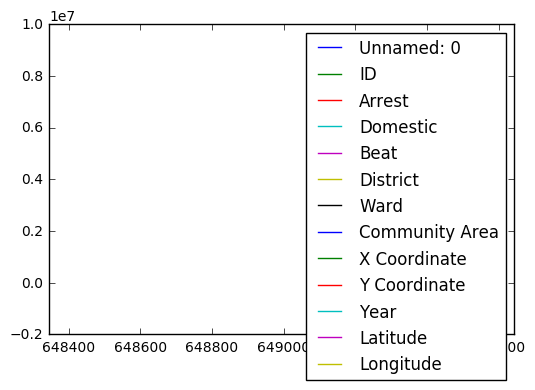

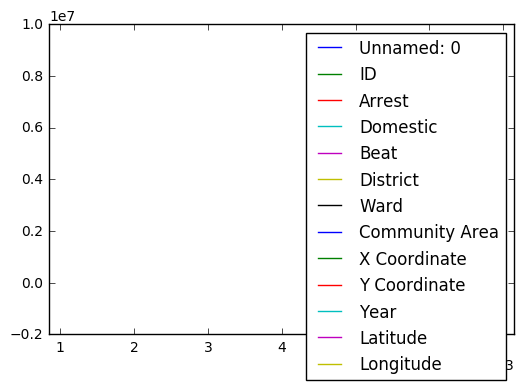

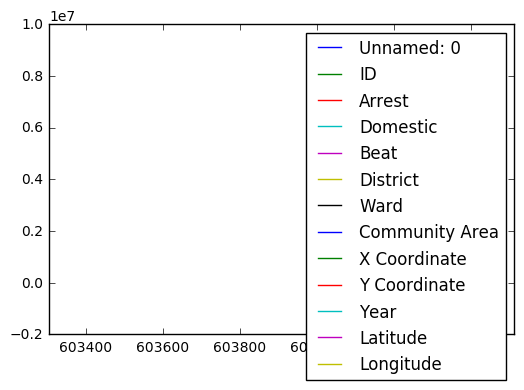

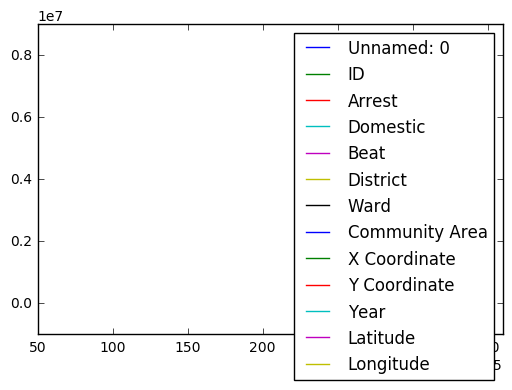

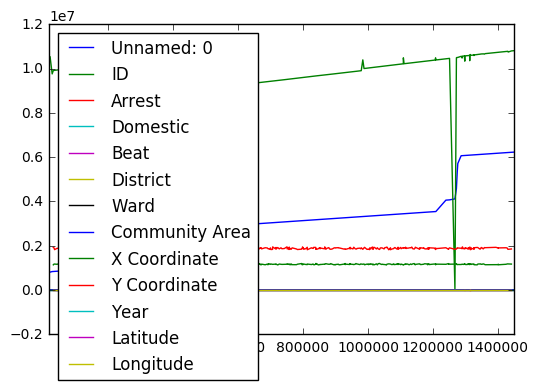

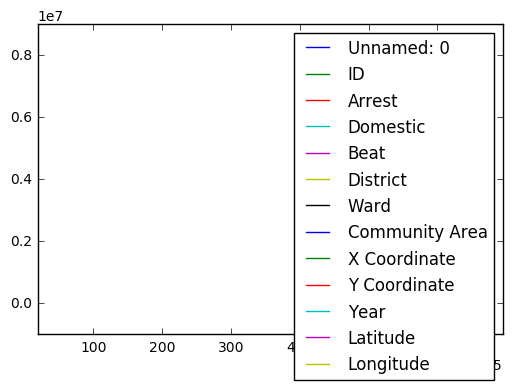

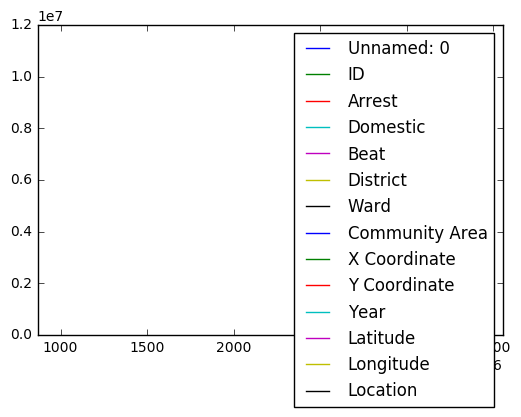

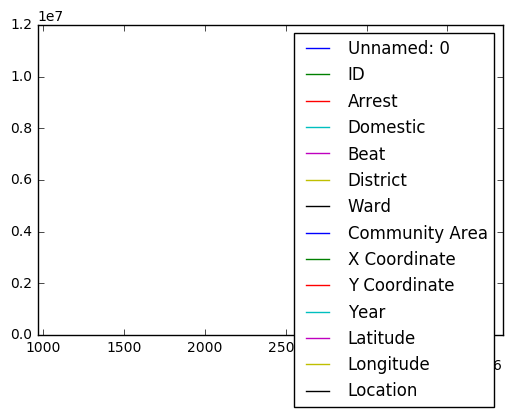

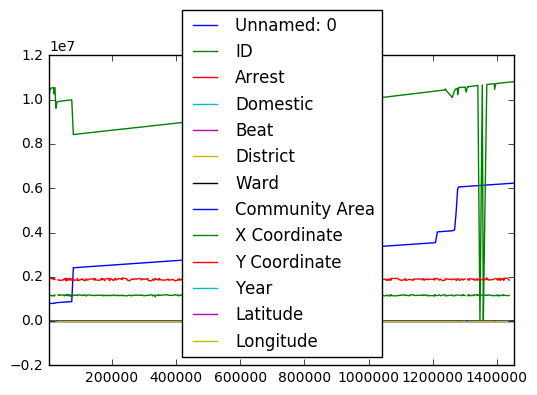

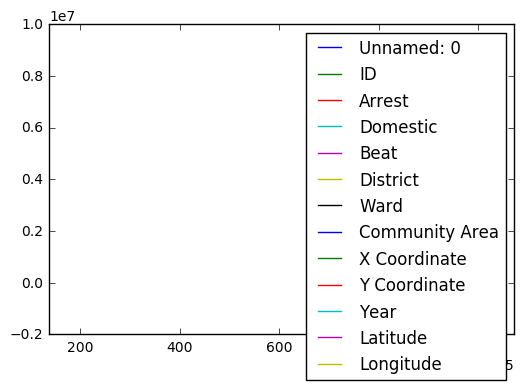

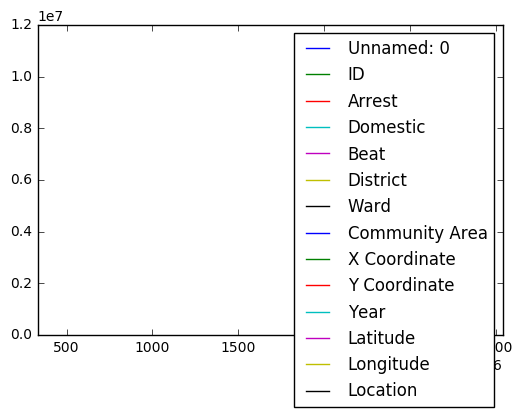

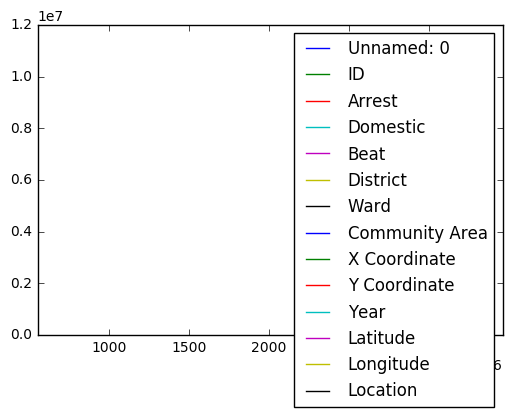

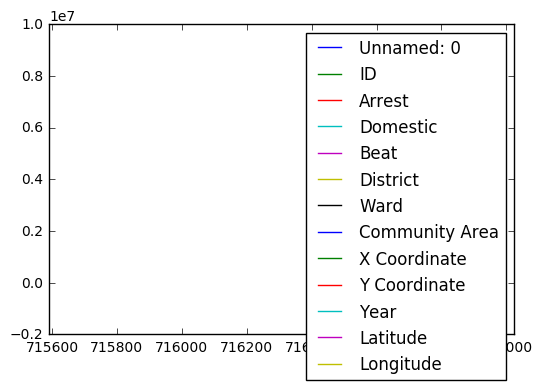

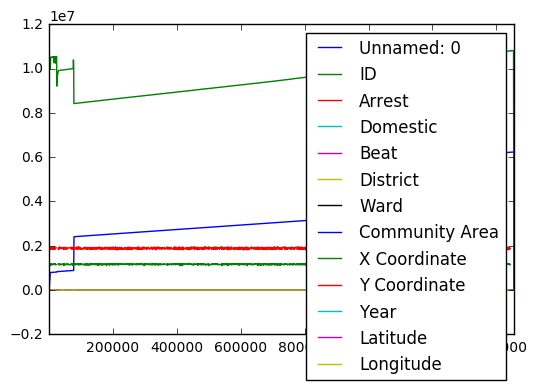

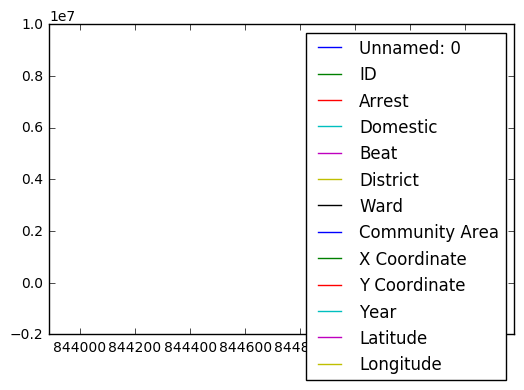

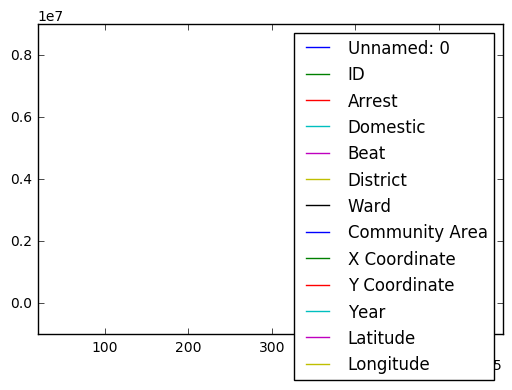

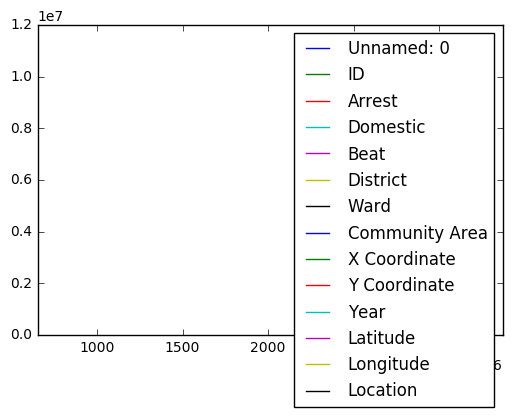

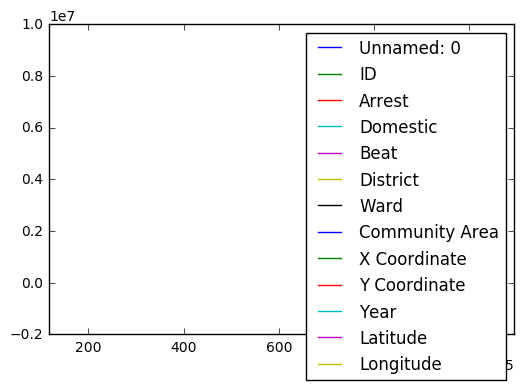

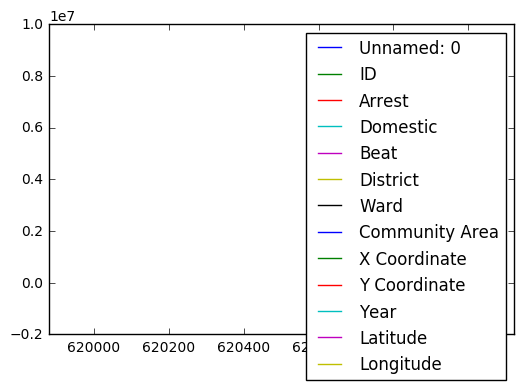

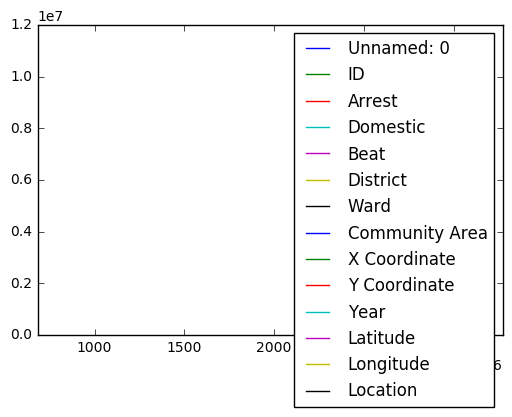

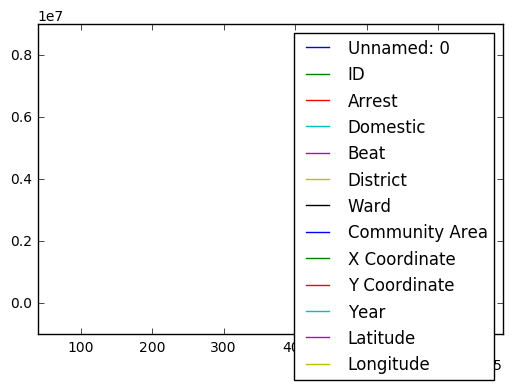

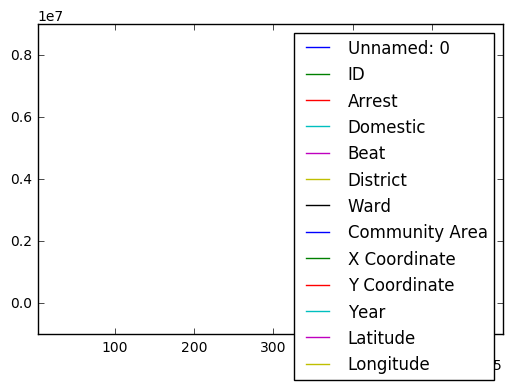

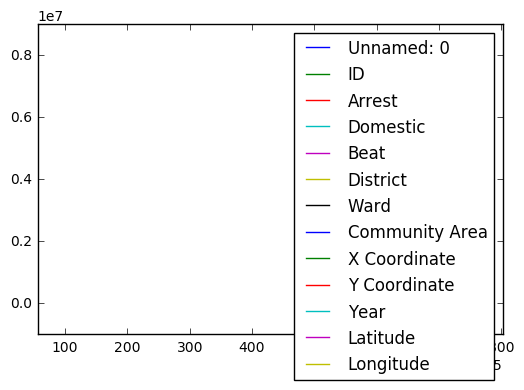

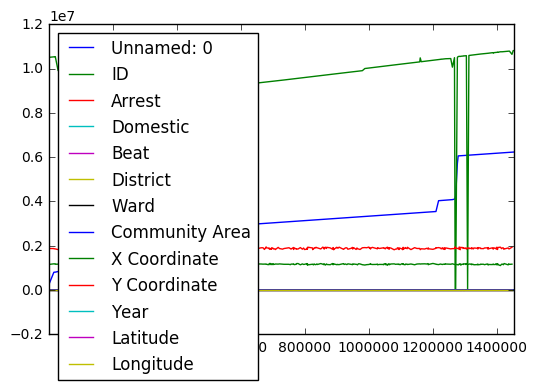

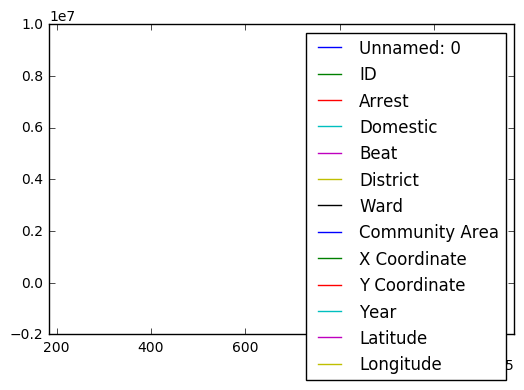

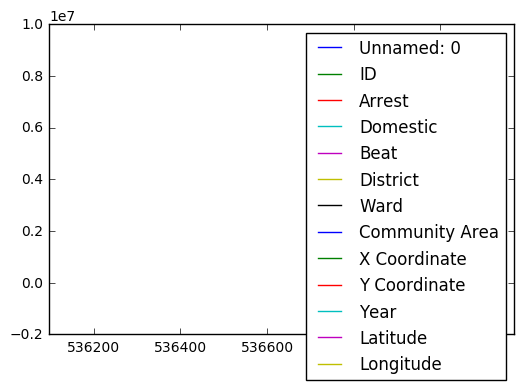

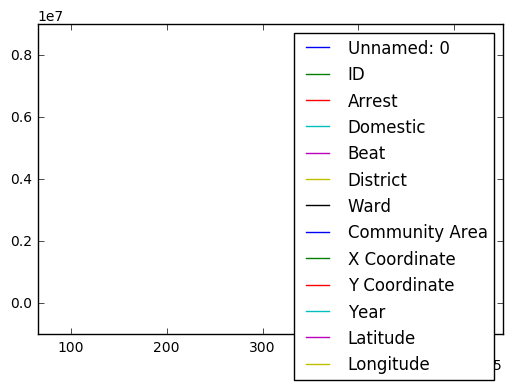

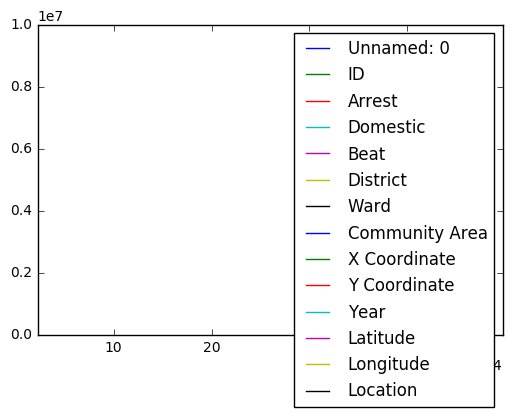

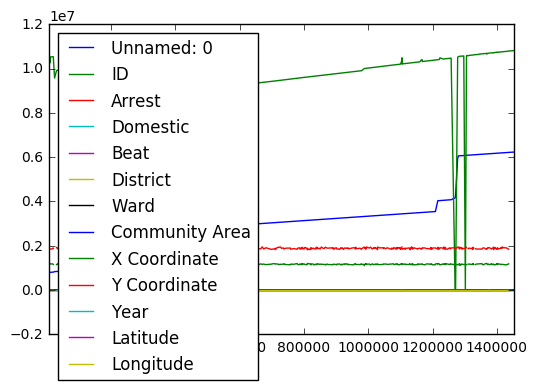

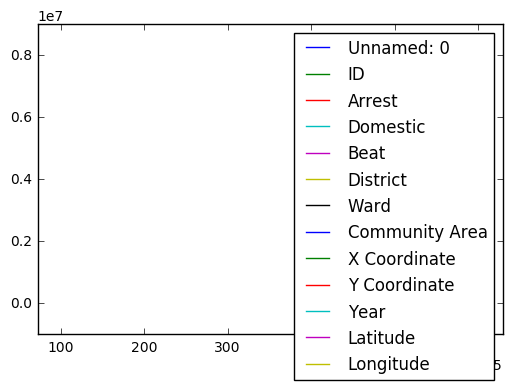

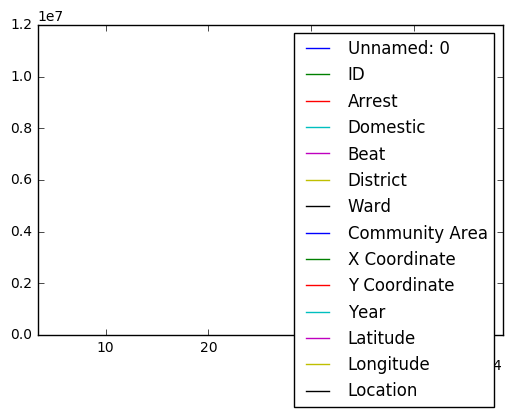

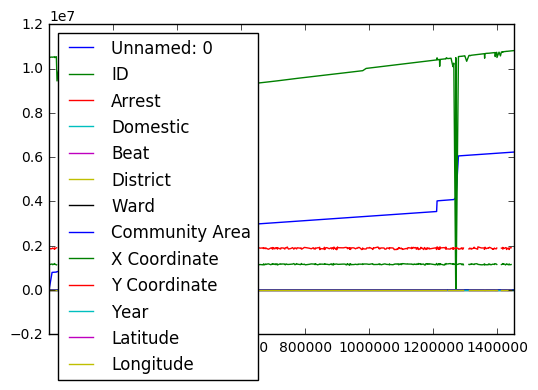

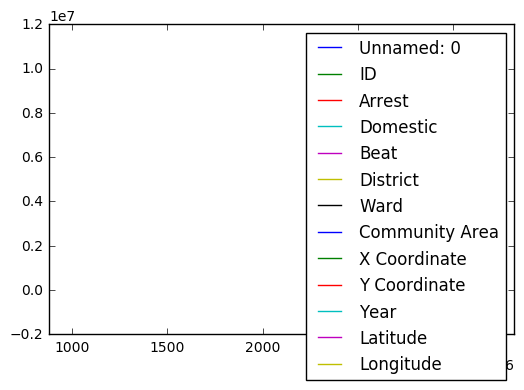

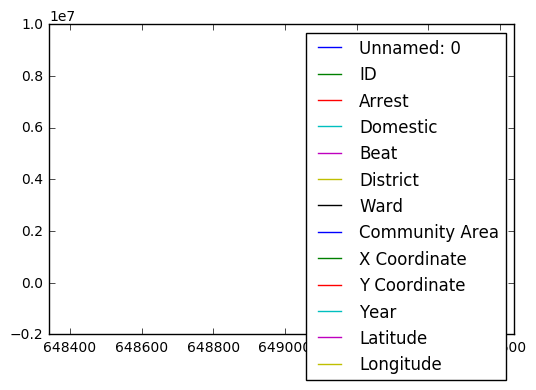

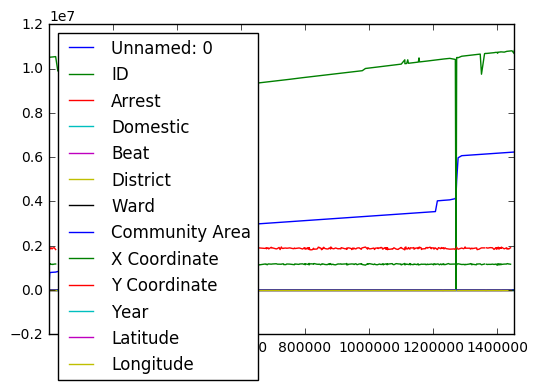

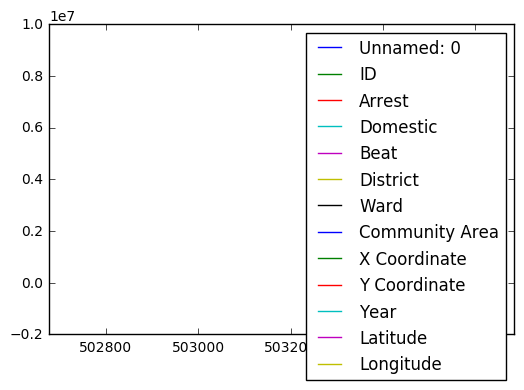

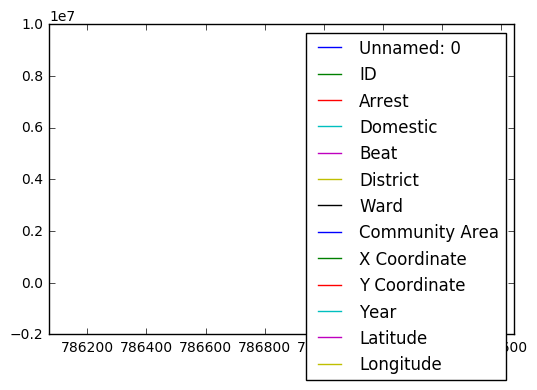

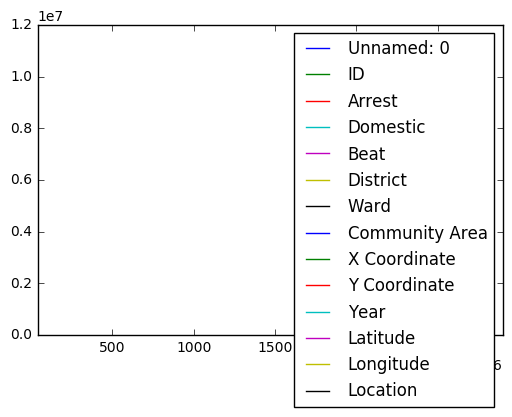

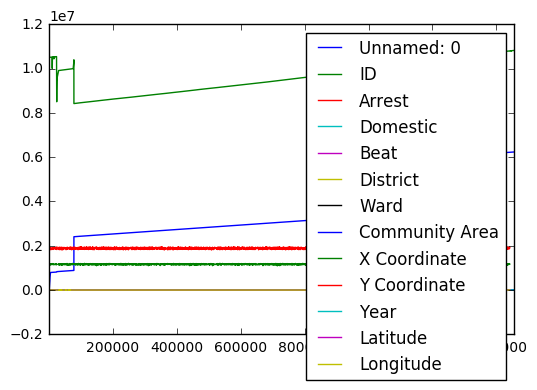

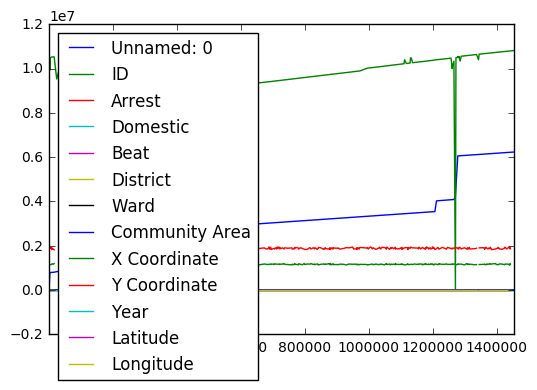

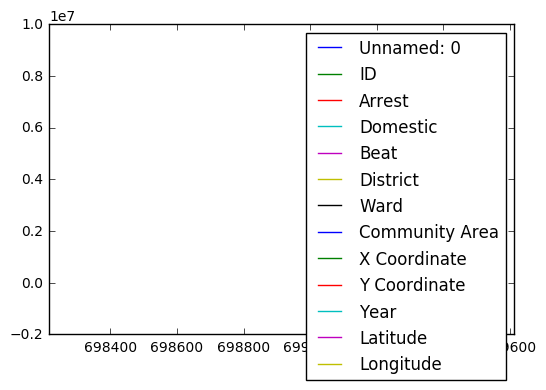

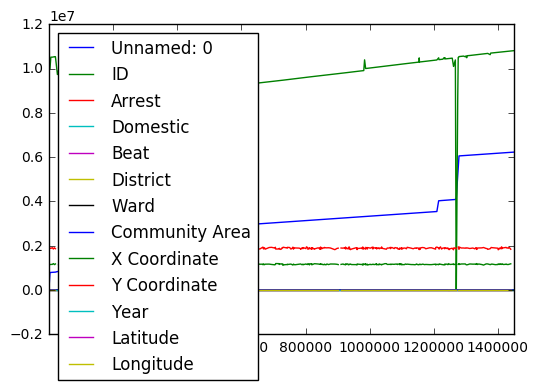

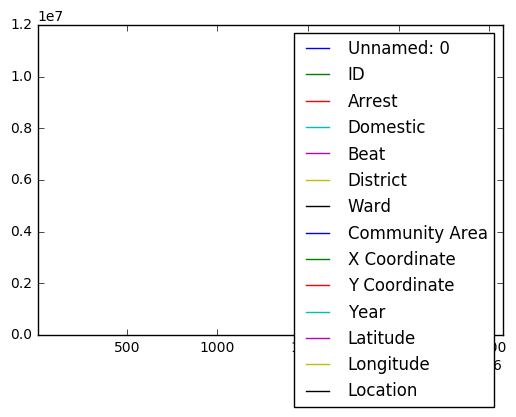

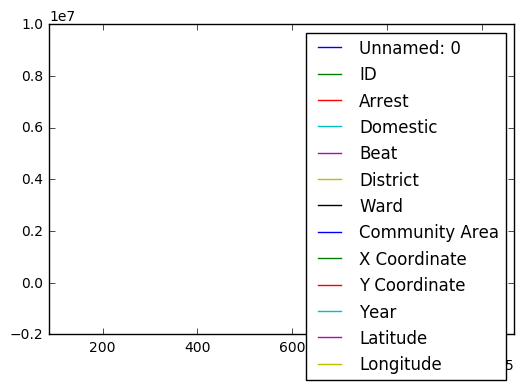

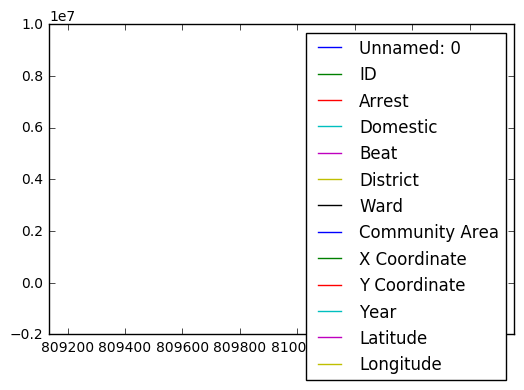

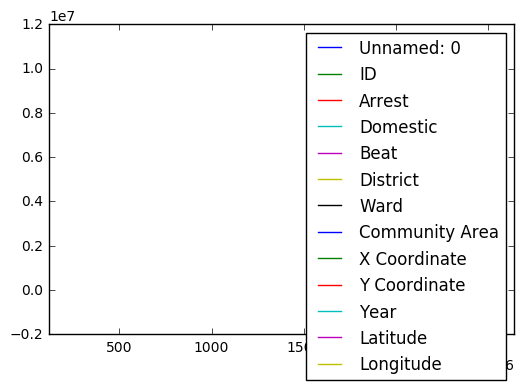

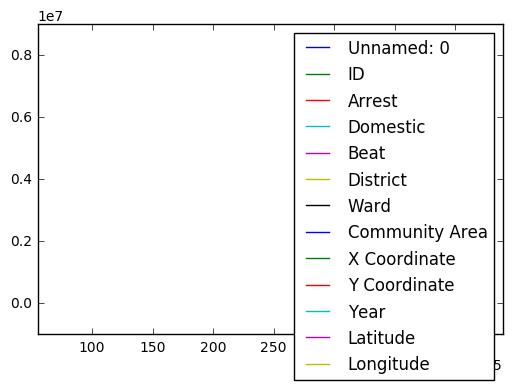

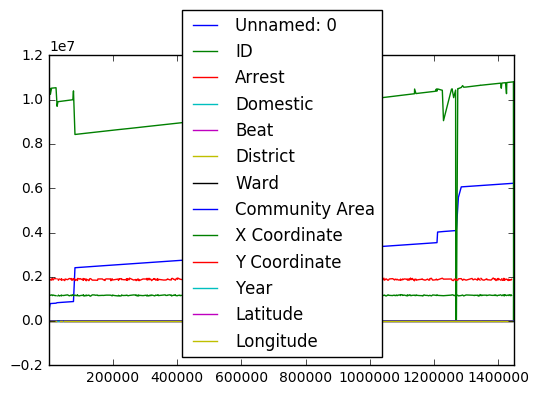

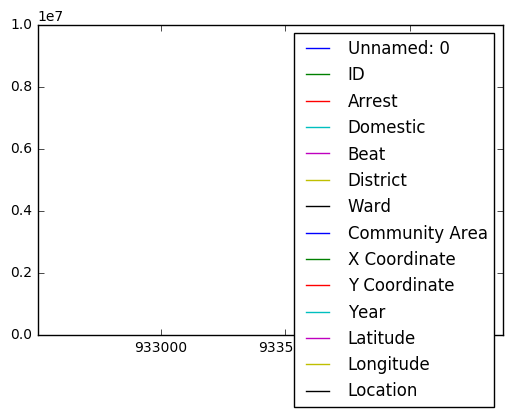

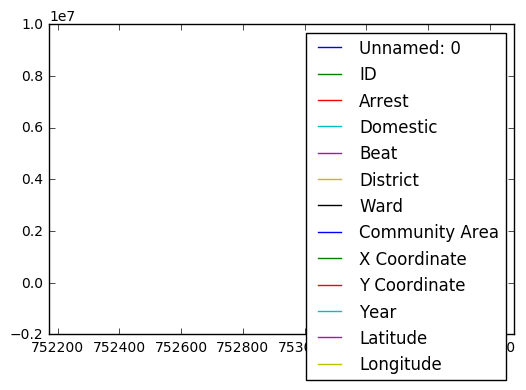

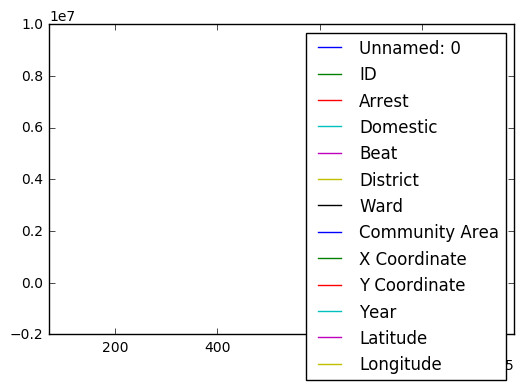

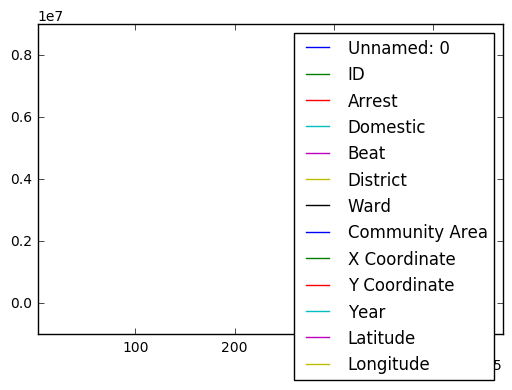

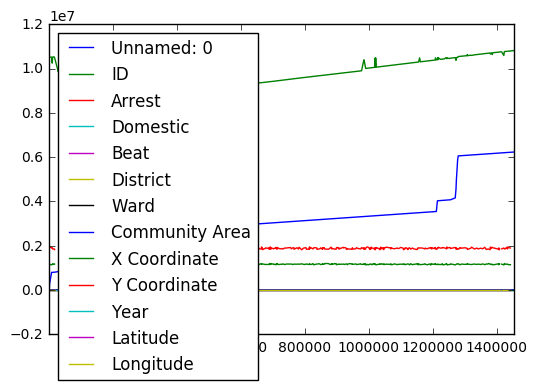

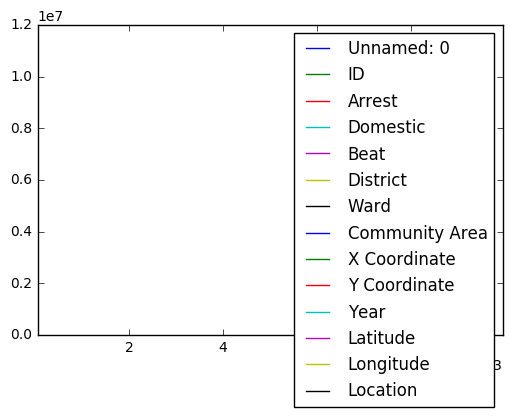

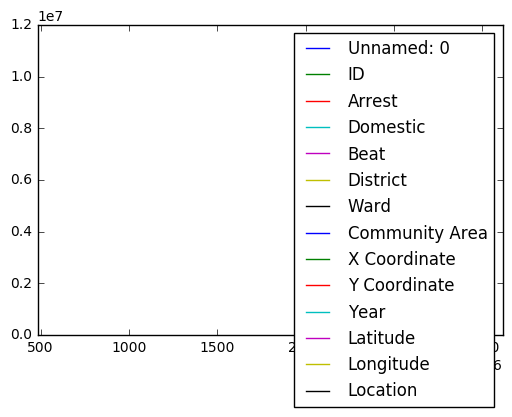

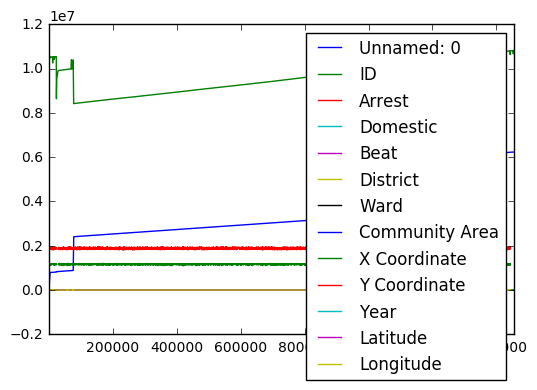

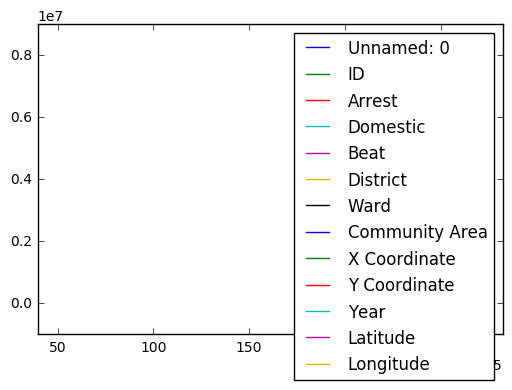

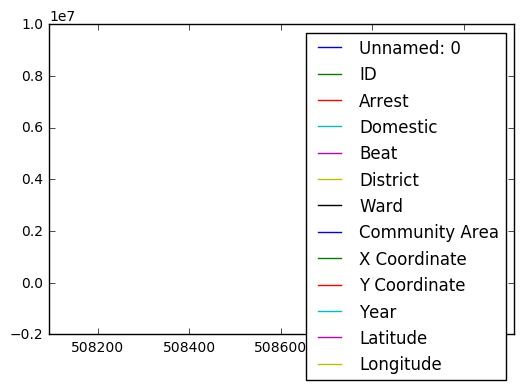

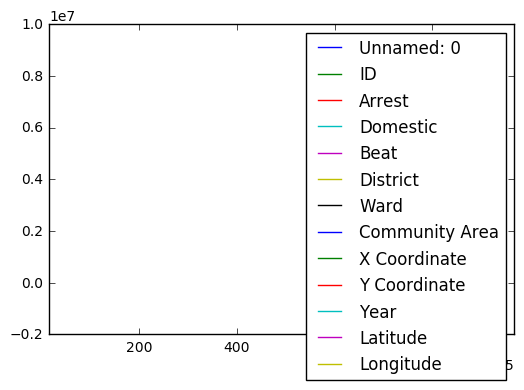

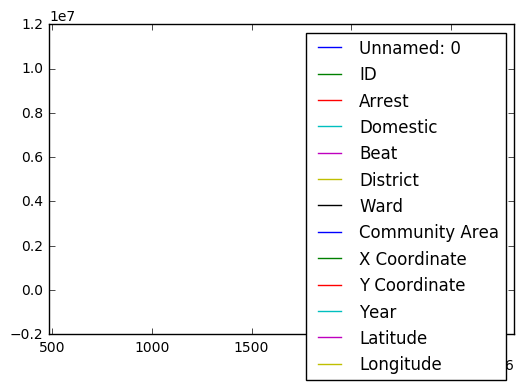

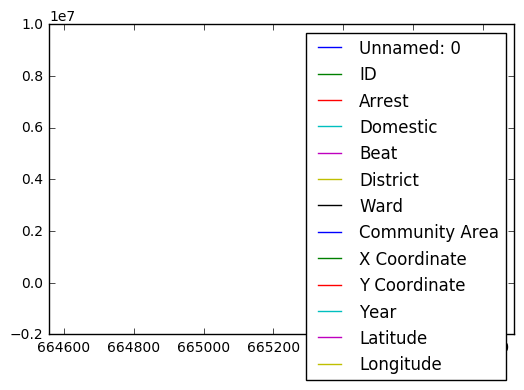

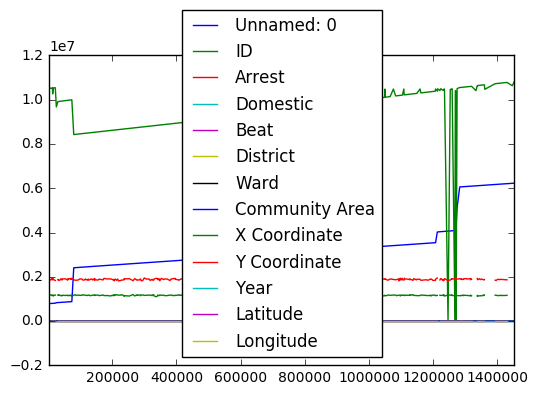

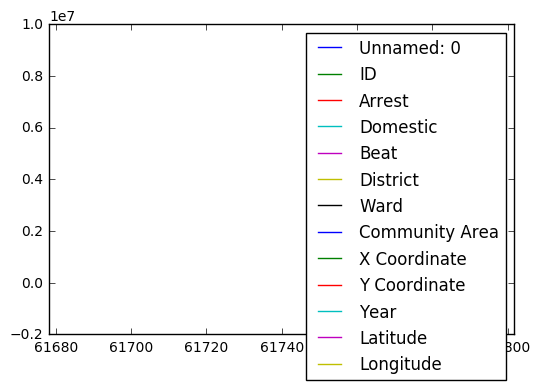

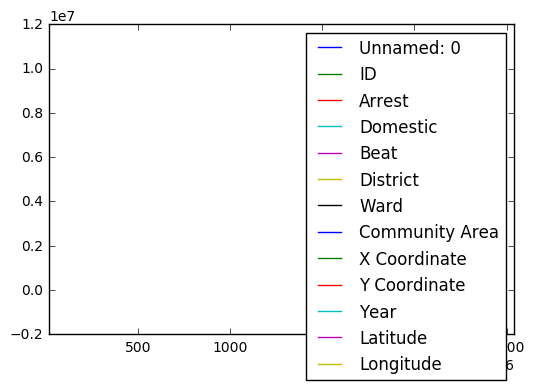

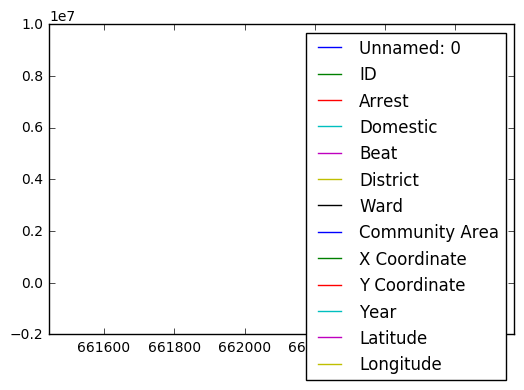

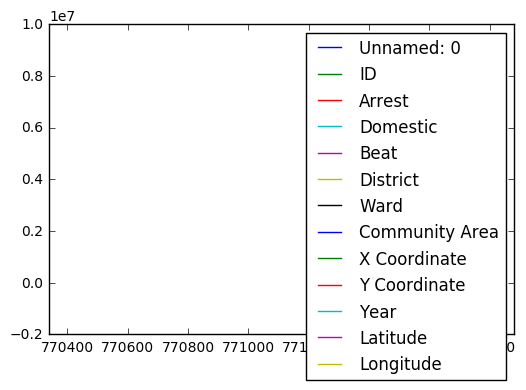

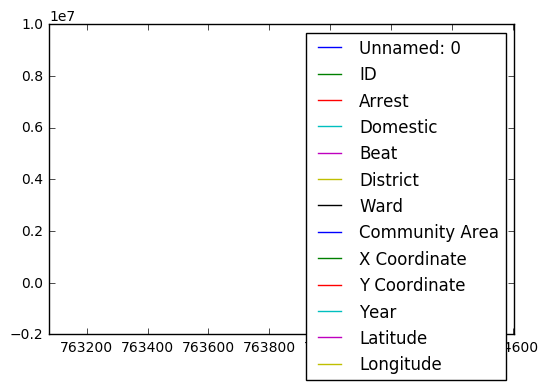

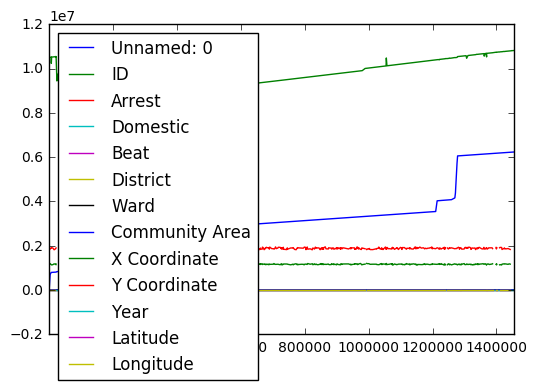

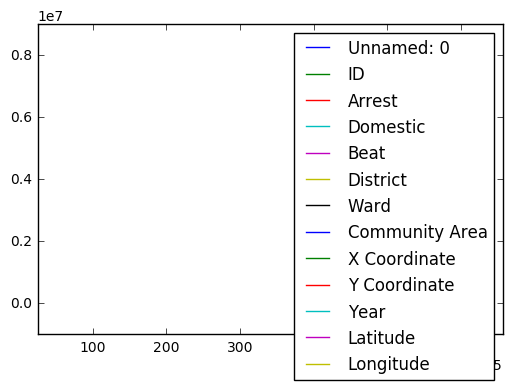

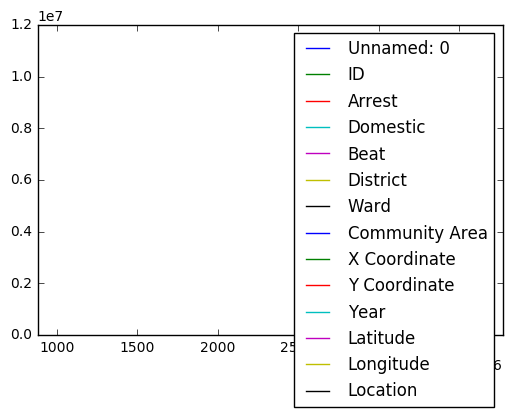

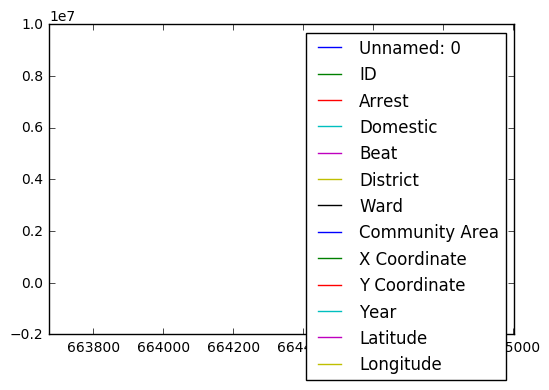

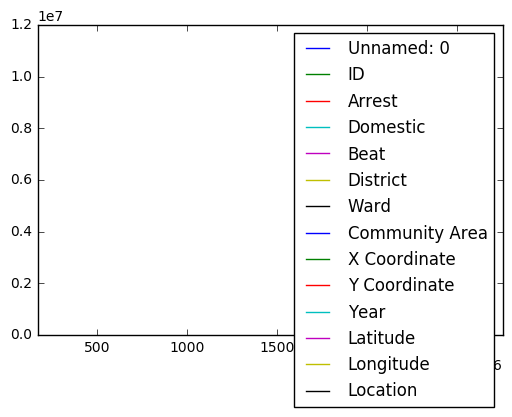

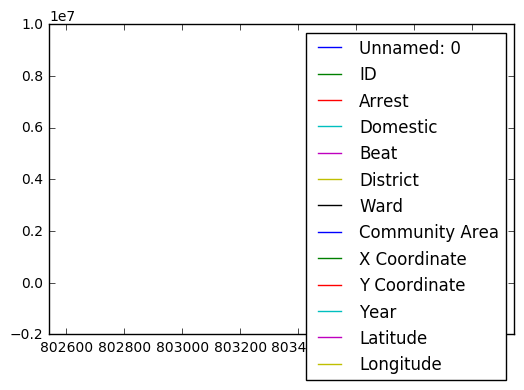

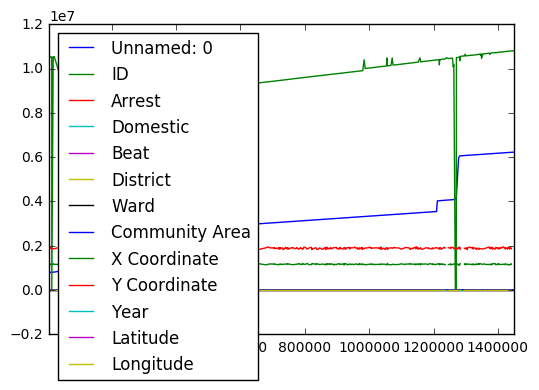

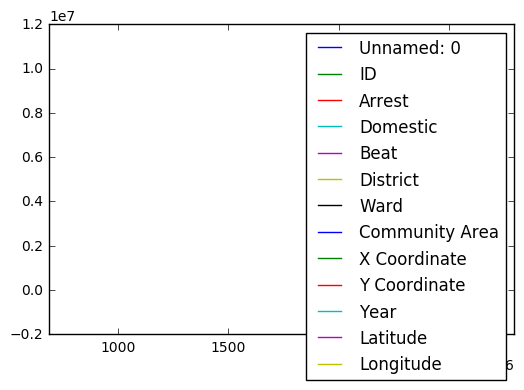

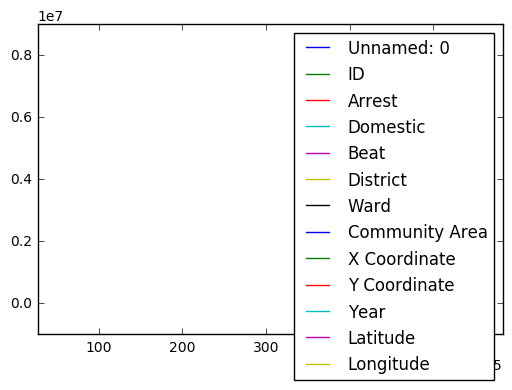

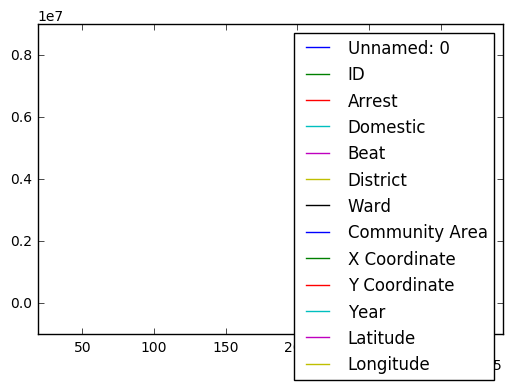

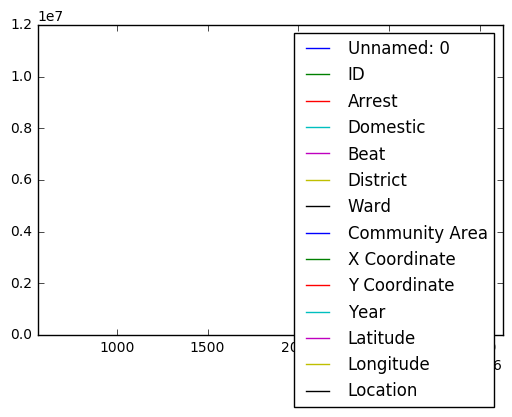

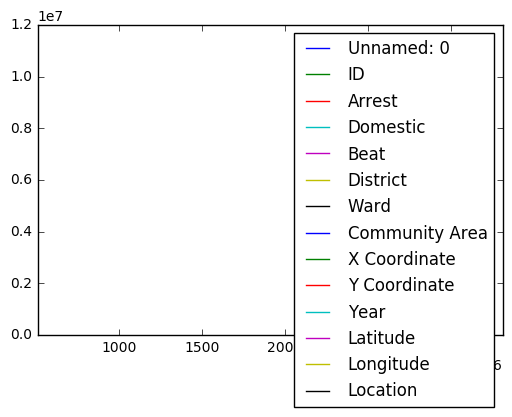

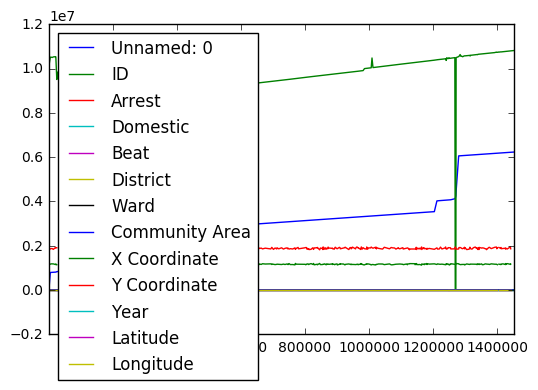

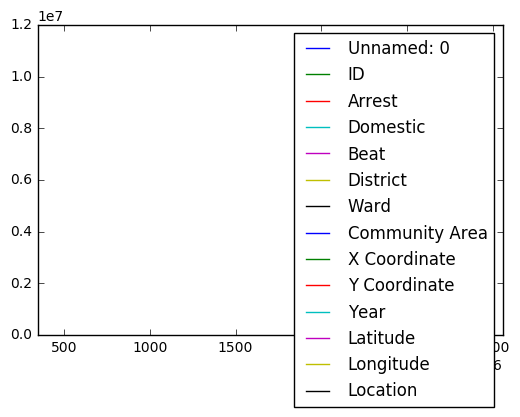

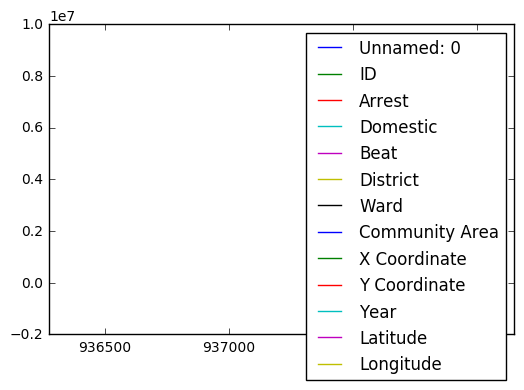

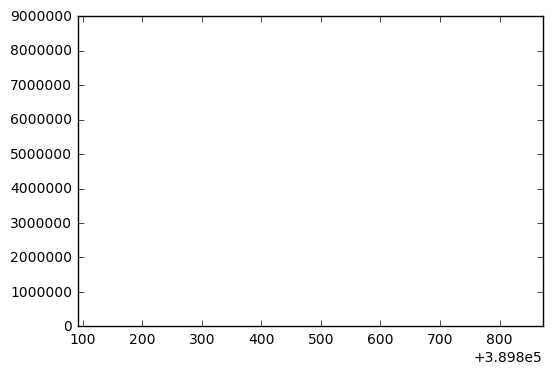

In [8]:
times = [x[1] for x in tokens]
df['times'] = times
grouped_time = df.groupby(by="times")
ax = grouped_time.plot(kind = 'line')
# times.sort()


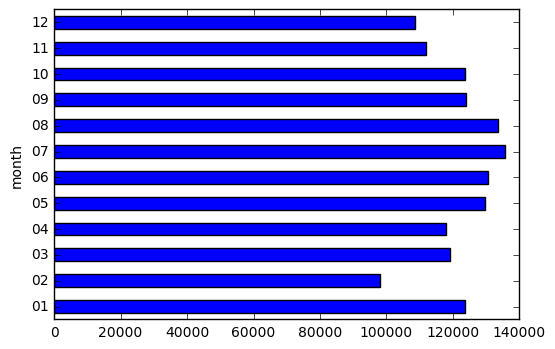

In [9]:
grouped = df.groupby(by="month")
month_arrests = grouped.Arrest.count()
ax = month_arrests.plot(kind = 'barh')


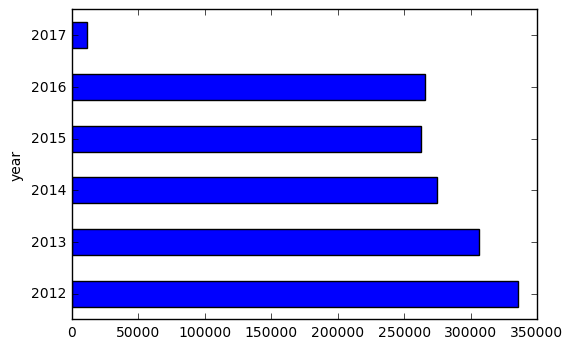

In [16]:
grouped = df.groupby(by="year")
year_arrests = grouped.Arrest.count()
ax = year_arrests.plot(kind = 'barh')